In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import math

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [125]:
#Set the Random Seed for Reproducibility 
np.random.seed(42)

# Import Data

In [126]:
df_ts = pd.read_csv('../data/USAverage_Energy_CO2_1970to2021.csv')

In [127]:
# setting year as the index 
df_ts.set_index('Year', inplace=True)

# Convert the index to a DatetimeIndex because the 
# that's the way seasonal_decompose wants it
df_ts.index = pd.to_datetime(df_ts.index, format='%Y')

# double checking 
df_ts.head()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
Year,,,,,,
1970-01-01,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1971-01-01,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
1972-01-01,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
1973-01-01,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
1974-01-01,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


# Time Series Analysis

## Plots to gain some insights regarding Data Trends

In [128]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

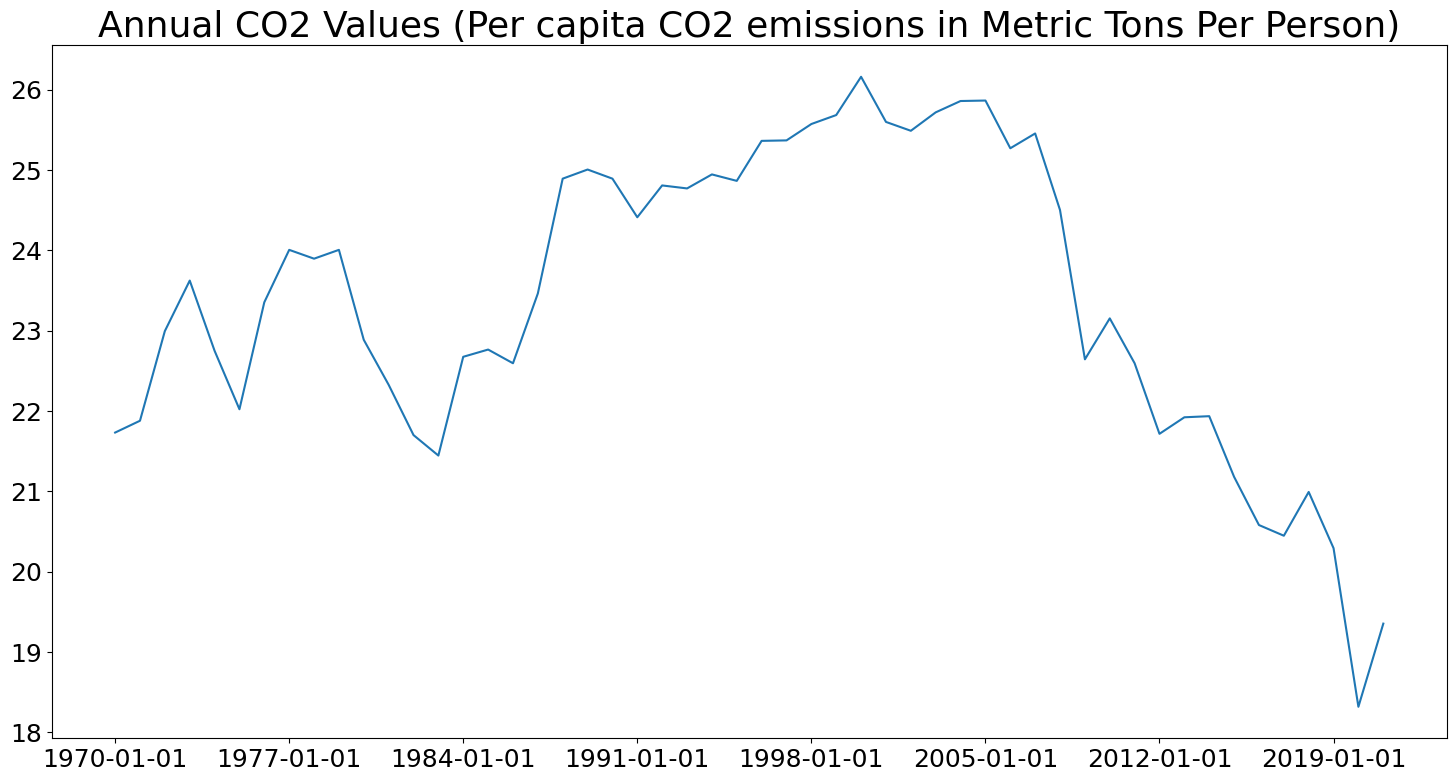

In [129]:
# Generate a time plot of our CO2 data.
plot_series(df_ts, ['CO2_Value'], title='Annual CO2 Values (Per capita CO2 emissions in Metric Tons Per Person)', steps = 7)

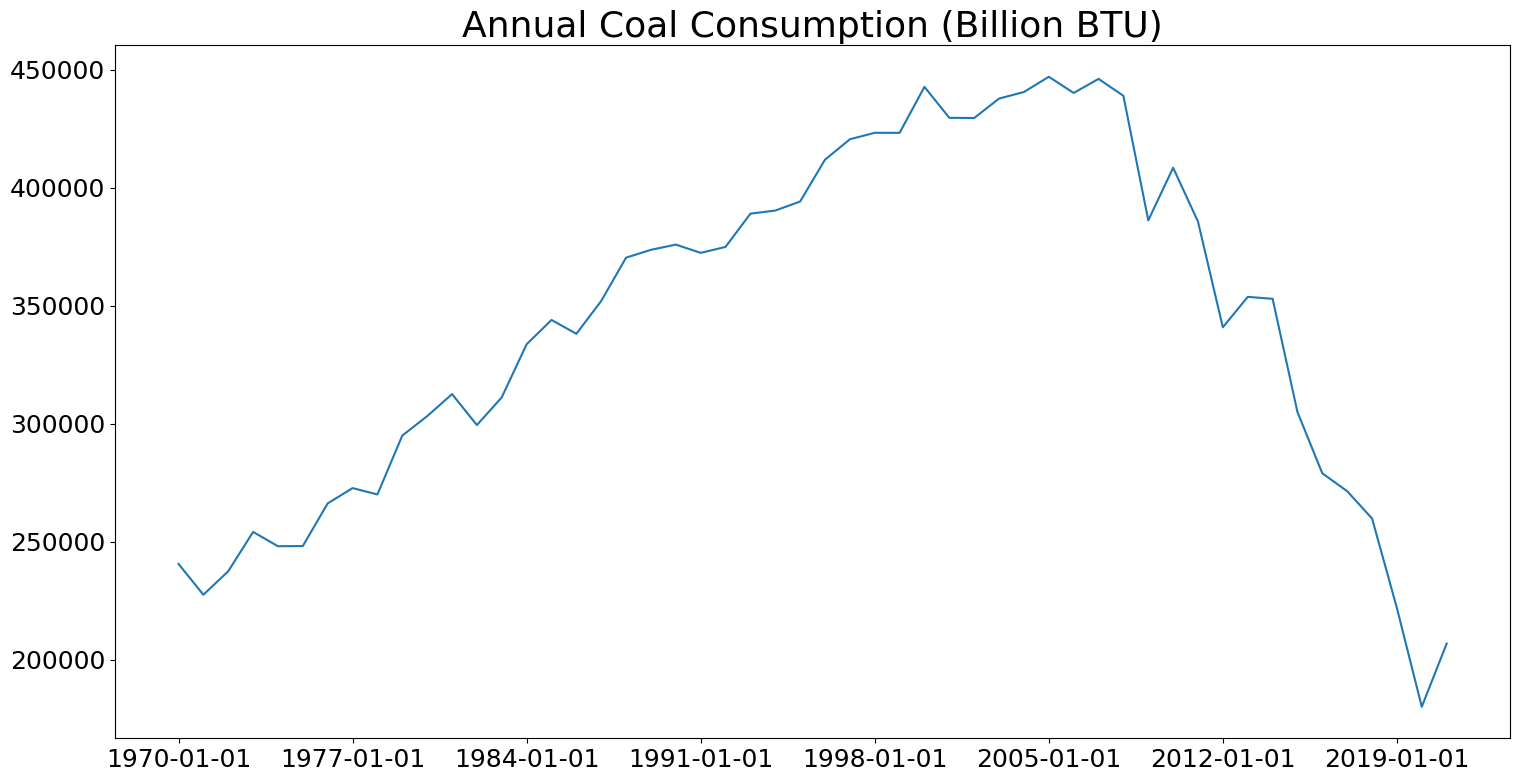

In [130]:
# Generate a time plot of our Coal data.
plot_series(df_ts, ['Coal_Value'], title='Annual Coal Consumption (Billion BTU)', steps = 7)

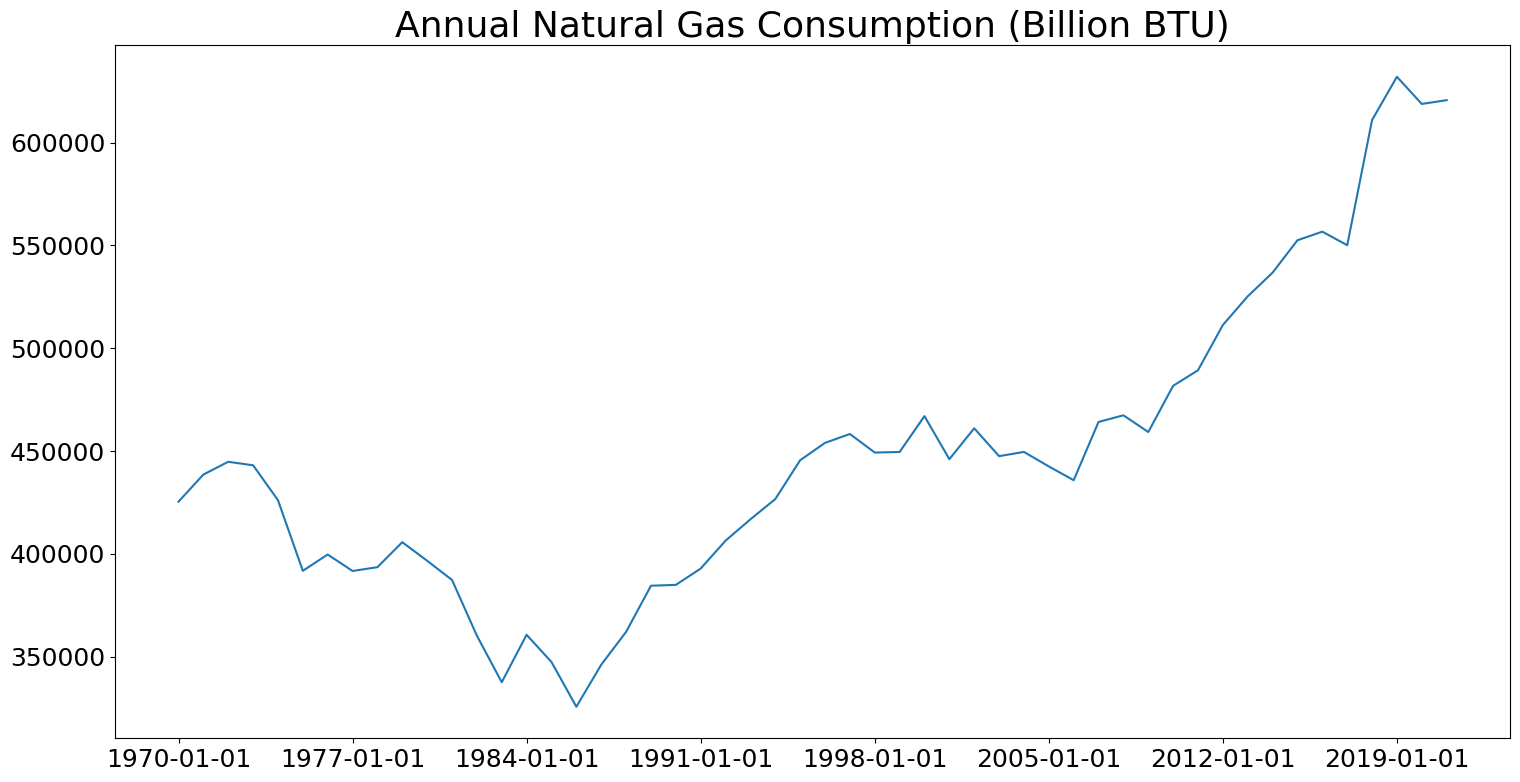

In [131]:
# Generate a time plot of our Natural Gas data.
plot_series(df_ts, ['Natural_Gas_Value'], title='Annual Natural Gas Consumption (Billion BTU)', steps = 7)

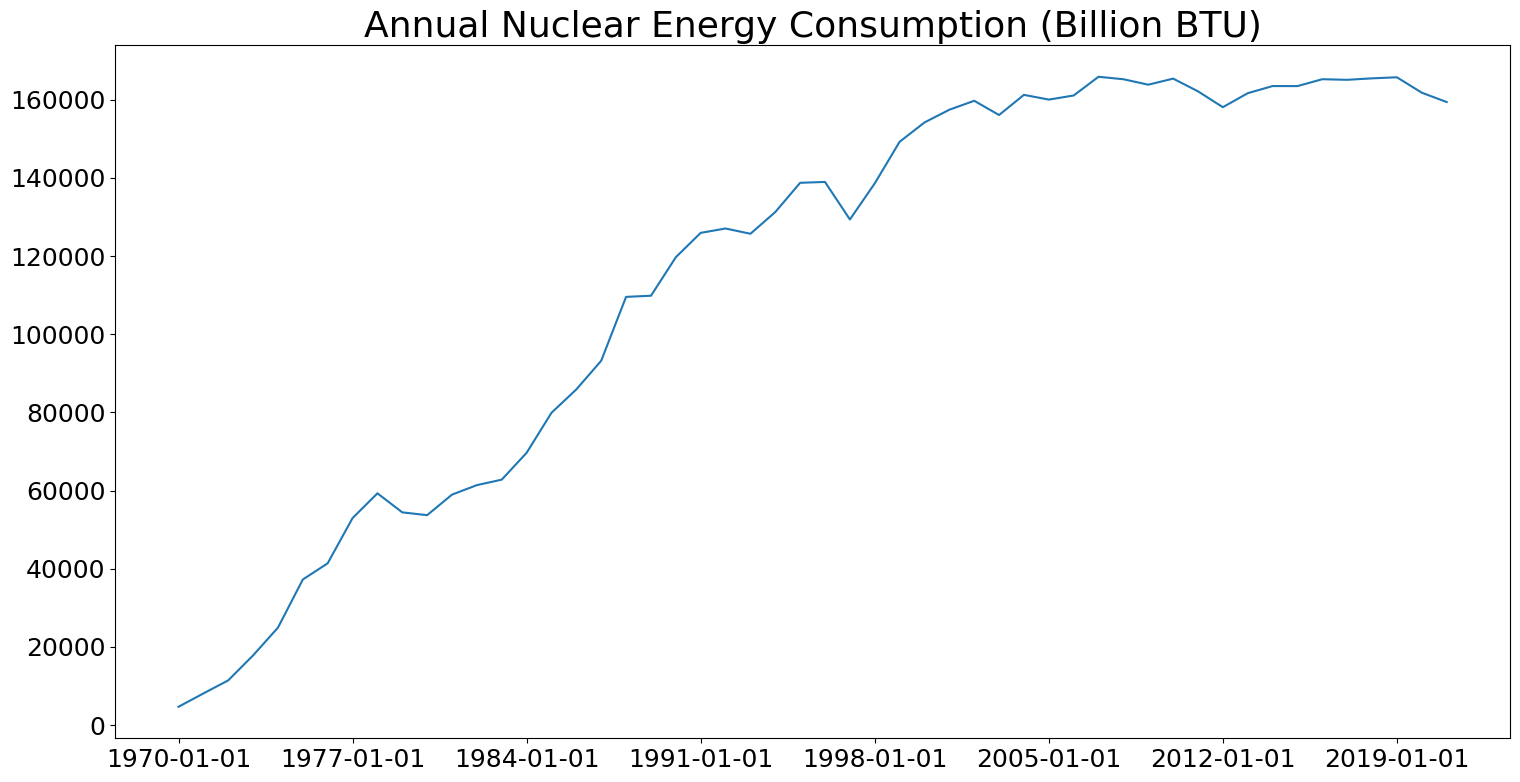

In [132]:
# Generate a time plot of our Nuclear Energy data.
plot_series(df_ts, ['Nuclear_Energy_Value'], title='Annual Nuclear Energy Consumption (Billion BTU)', steps = 7)

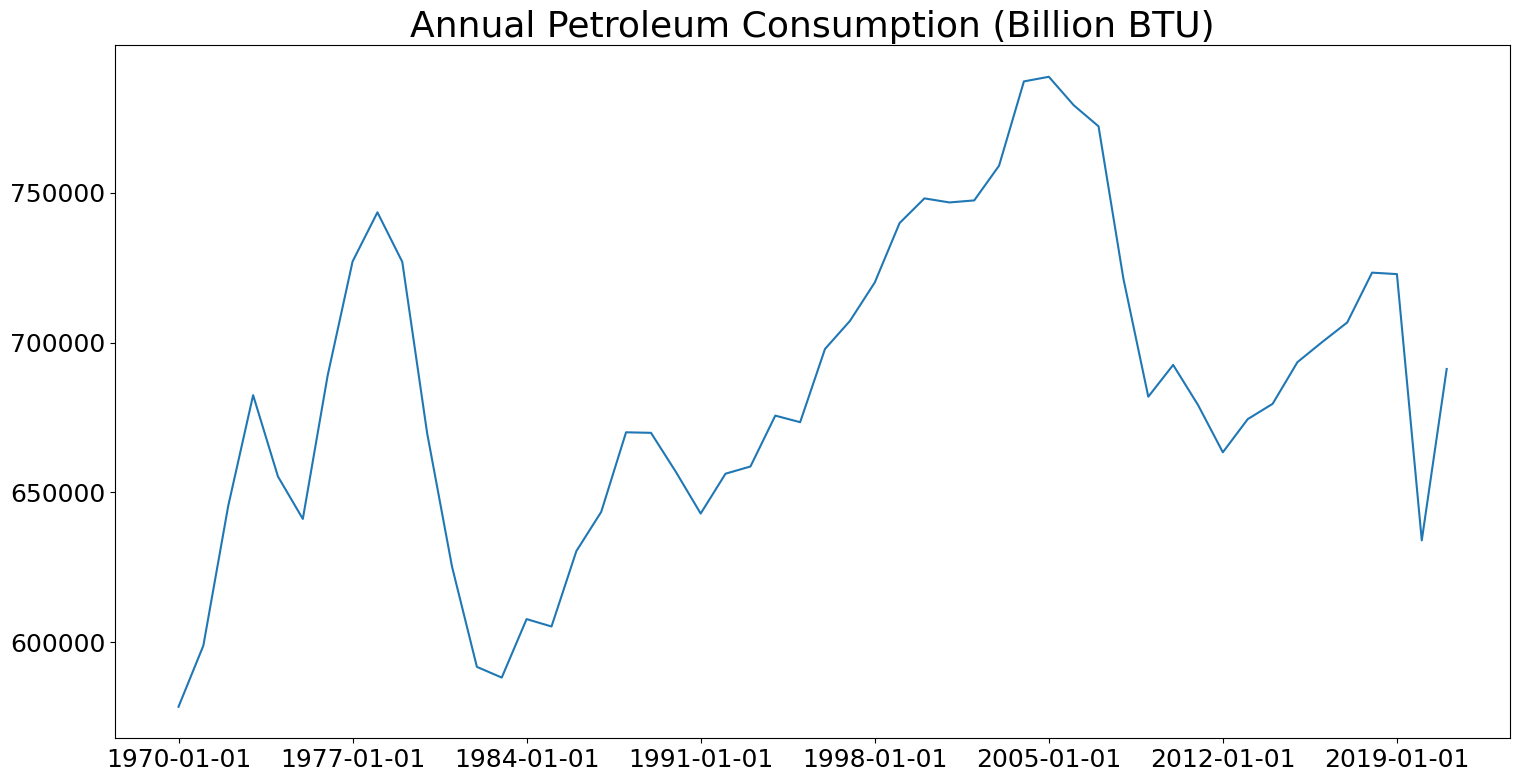

In [133]:
# Generate a time plot of our Petroleum data.
plot_series(df_ts, ['Petroleum_Energy_Value'], title='Annual Petroleum Consumption (Billion BTU)', steps = 7)

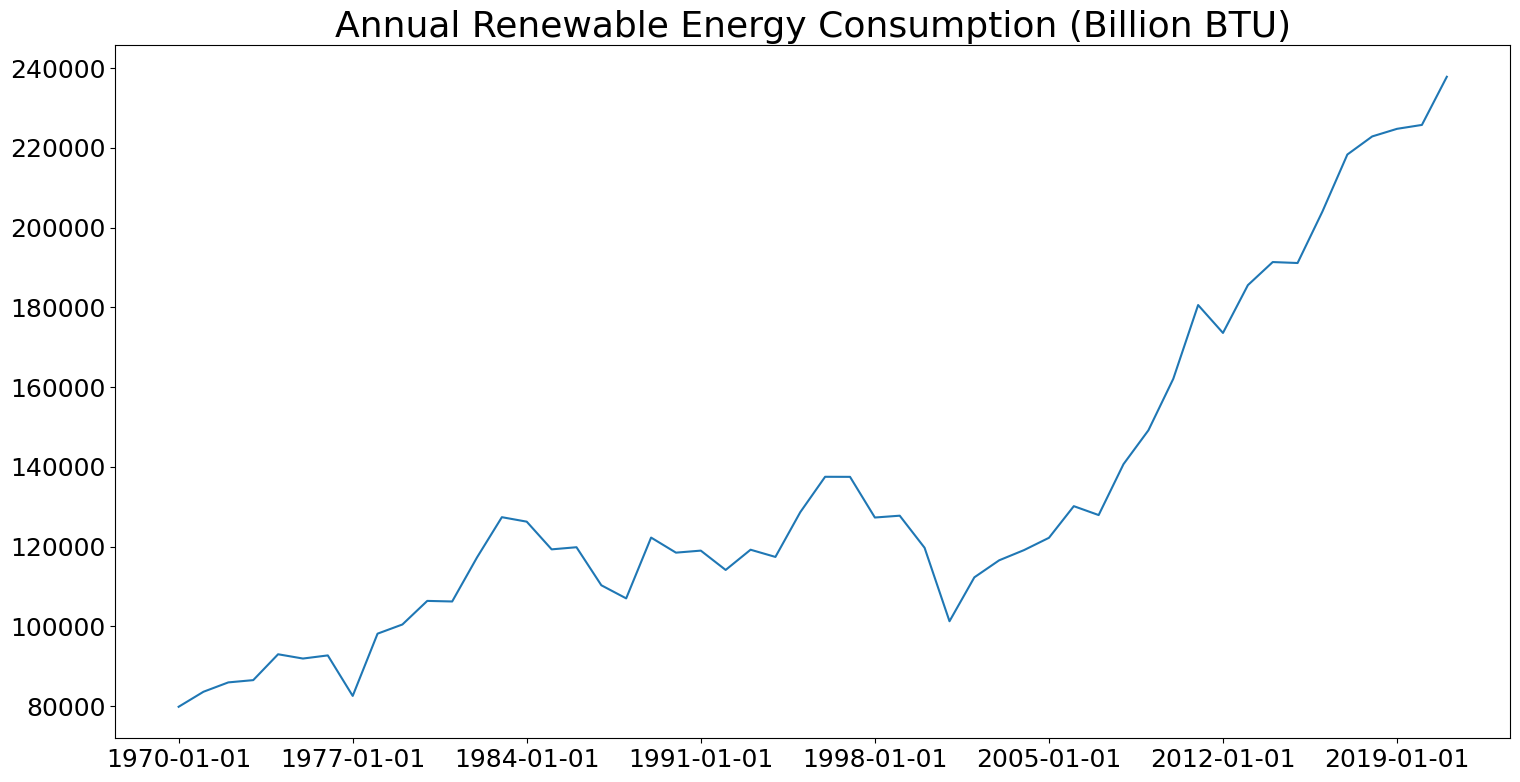

In [134]:
# Generate a time plot of our Renewable Energy data.
plot_series(df_ts, ['Renewable_Energy_Value'], title='Annual Renewable Energy Consumption (Billion BTU)', steps = 7)

## Modeling Section

### Differentiate a couple times for each of the values to run through our model 

In [135]:
df_ts.columns

Index(['CO2_Value', 'Coal_Value', 'Natural_Gas_Value', 'Nuclear_Energy_Value',
       'Petroleum_Energy_Value', 'Renewable_Energy_Value'],
      dtype='object')

In [136]:
# Create first_diff and second_diff columns in dataframe for CO2
df_ts['first_diff_CO2_Value'] = df_ts['CO2_Value'].diff()
df_ts['second_diff_CO2_Value'] = (df_ts['CO2_Value'].diff()).diff()

In [137]:
# Create first_diff and second_diff columns in dataframe for Coal
df_ts['first_diff_Coal_Value'] = df_ts['Coal_Value'].diff()
df_ts['second_diff_Coal_Value'] = (df_ts['Coal_Value'].diff()).diff()

In [138]:
# Create first_diff and second_diff columns in dataframe for Natural Gas
df_ts['first_diff_Natural_Gas_Value'] = df_ts['Natural_Gas_Value'].diff()
df_ts['second_diff_Natural_Gas_Value'] = (df_ts['Natural_Gas_Value'].diff()).diff()

In [139]:
# Create first_diff and second_diff columns in dataframe for Nuclear Energy
df_ts['first_diff_Nuclear_Energy_Value'] = df_ts['Nuclear_Energy_Value'].diff()
df_ts['second_diff_Nuclear_Energy_Value'] = (df_ts['Nuclear_Energy_Value'].diff()).diff()

In [140]:
# Create first_diff and second_diff columns in dataframe for Petroleum
df_ts['first_diff_Petroleum_Energy_Value'] = df_ts['Petroleum_Energy_Value'].diff()
df_ts['second_diff_Petroleum_Energy_Value'] = (df_ts['Petroleum_Energy_Value'].diff()).diff()

In [141]:
# Create first_diff and second_diff columns in dataframe for Renewable Energy
df_ts['first_diff_Renewable_Energy_Value'] = df_ts['Renewable_Energy_Value'].diff()
df_ts['second_diff_Renewable_Energy_Value'] = (df_ts['Renewable_Energy_Value'].diff()).diff()

### Examining Diff Plots 

#### CO2 Plots

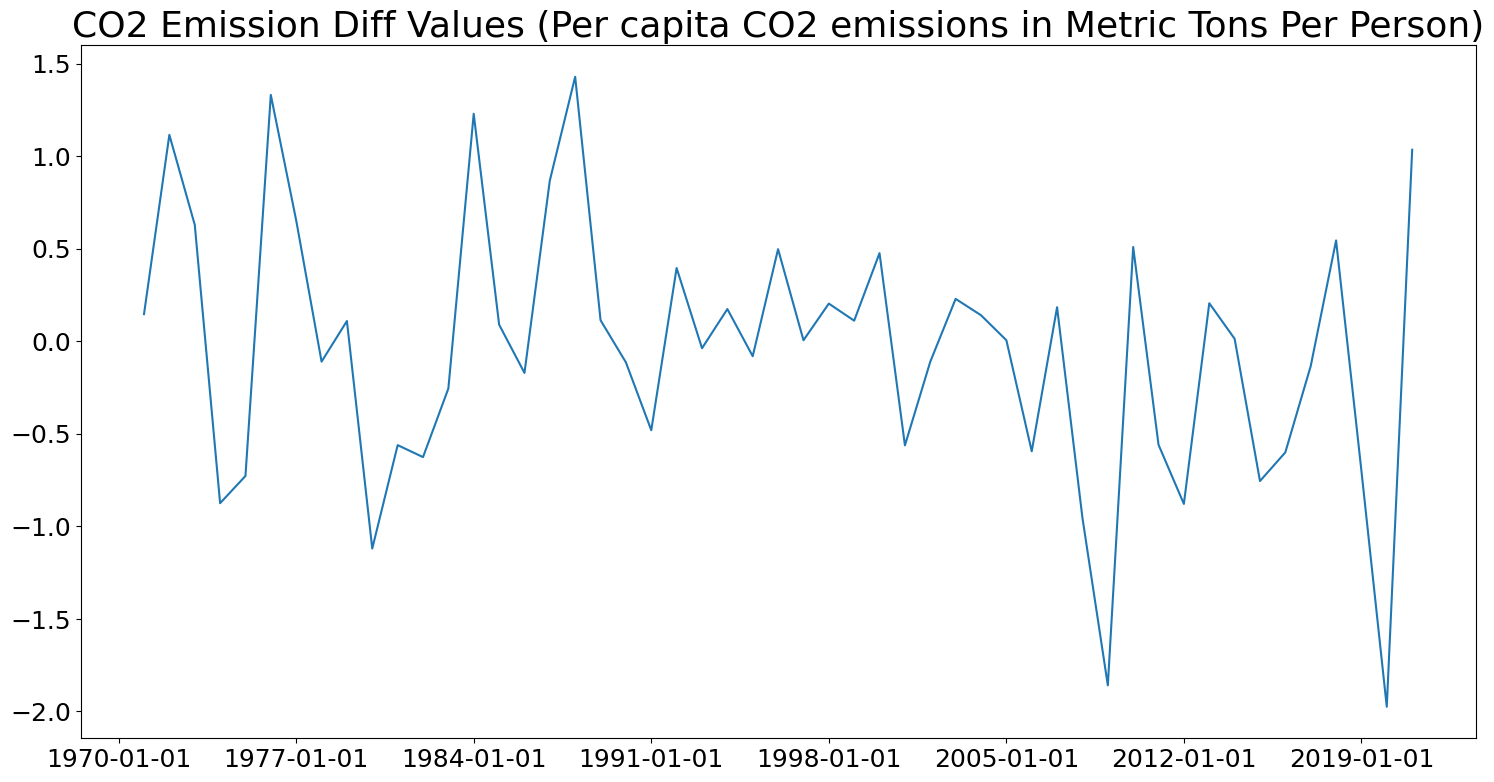

In [142]:
plot_series(df_ts, ['first_diff_CO2_Value'], title='CO2 Emission Diff Values (Per capita CO2 emissions in Metric Tons Per Person)', steps = 7)

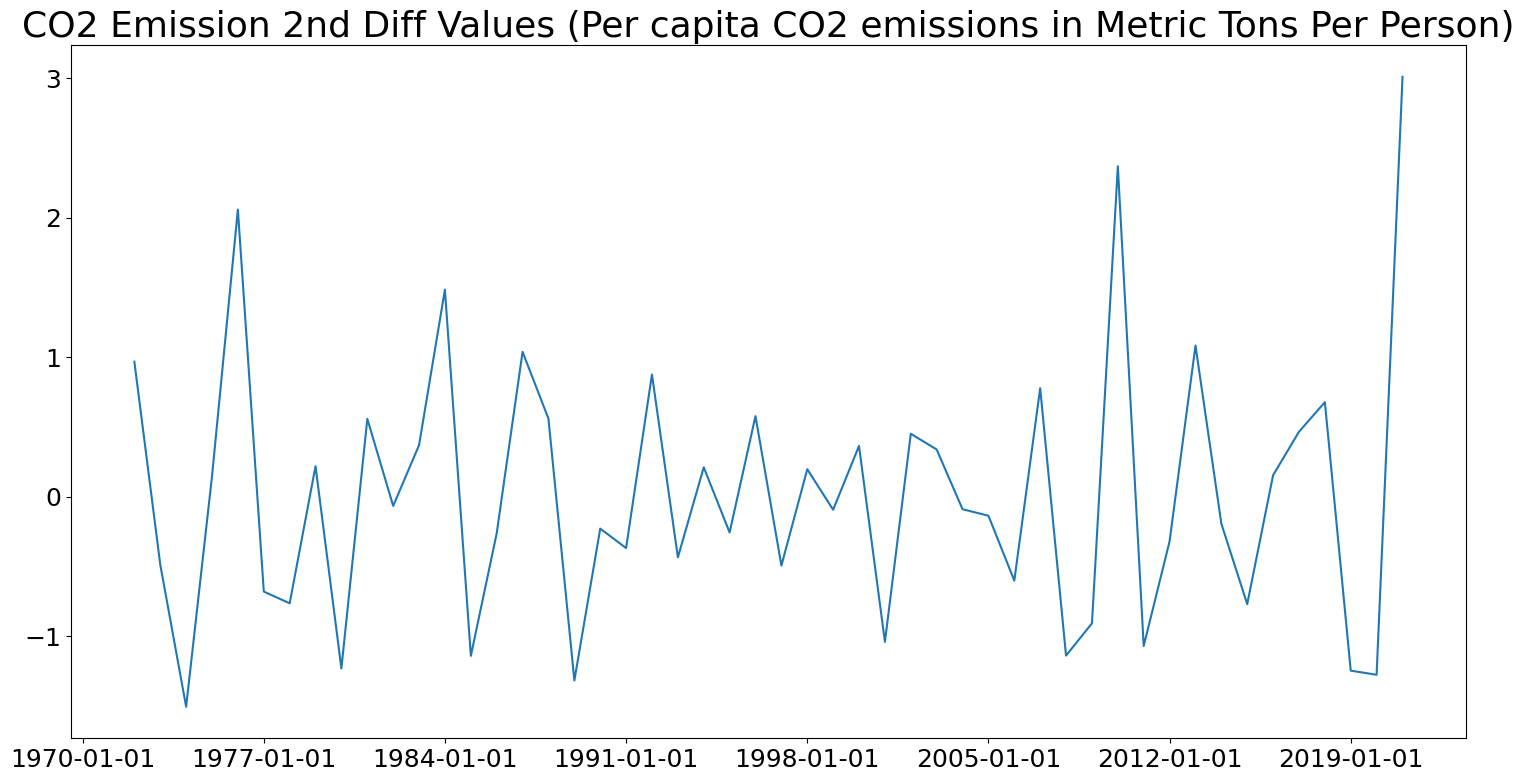

In [143]:
plot_series(df_ts, ['second_diff_CO2_Value'], title='CO2 Emission 2nd Diff Values (Per capita CO2 emissions in Metric Tons Per Person)', steps = 7)

#### Energy Plots

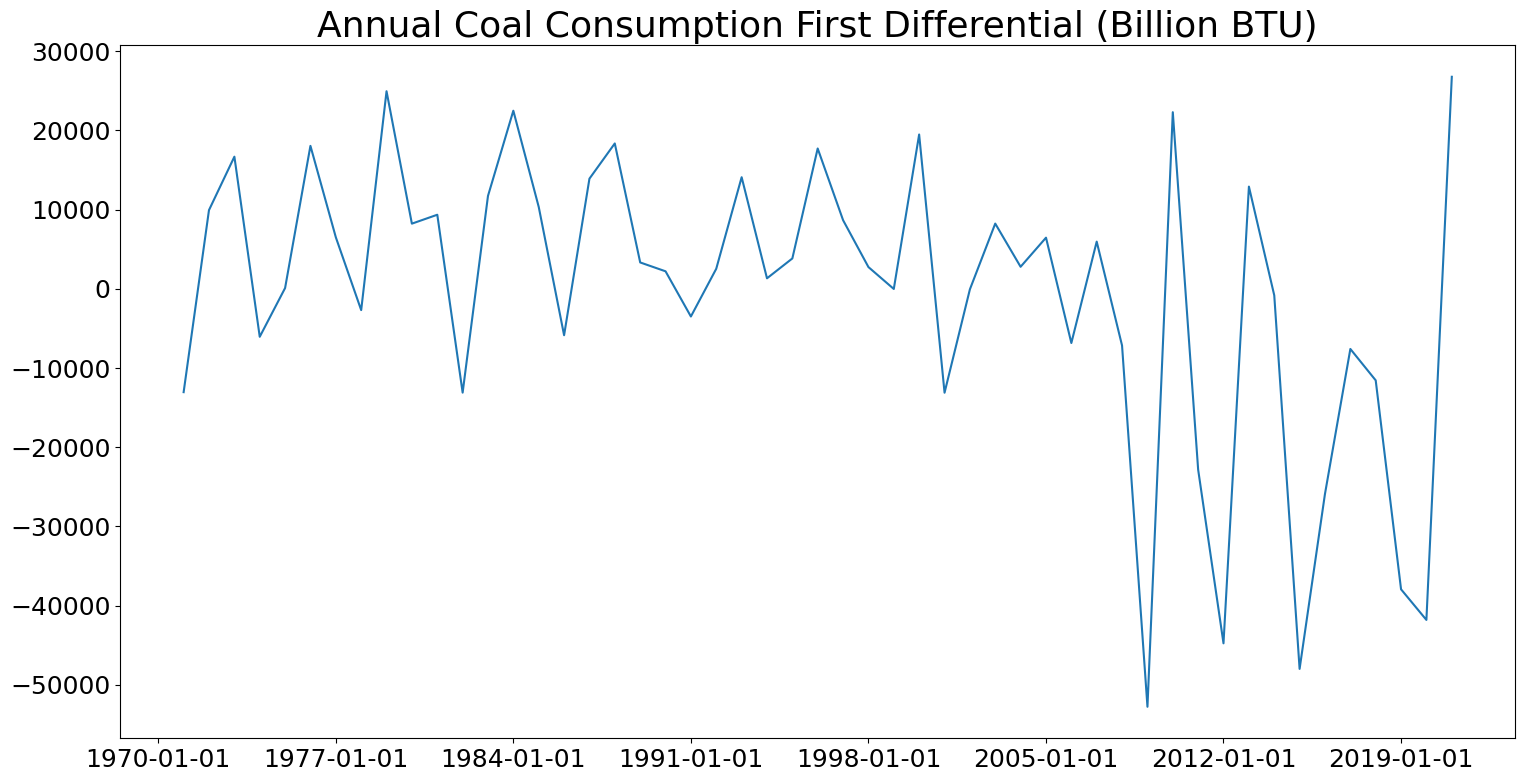

In [144]:
plot_series(df_ts, ['first_diff_Coal_Value'], title='Annual Coal Consumption First Differential (Billion BTU)', steps = 7)

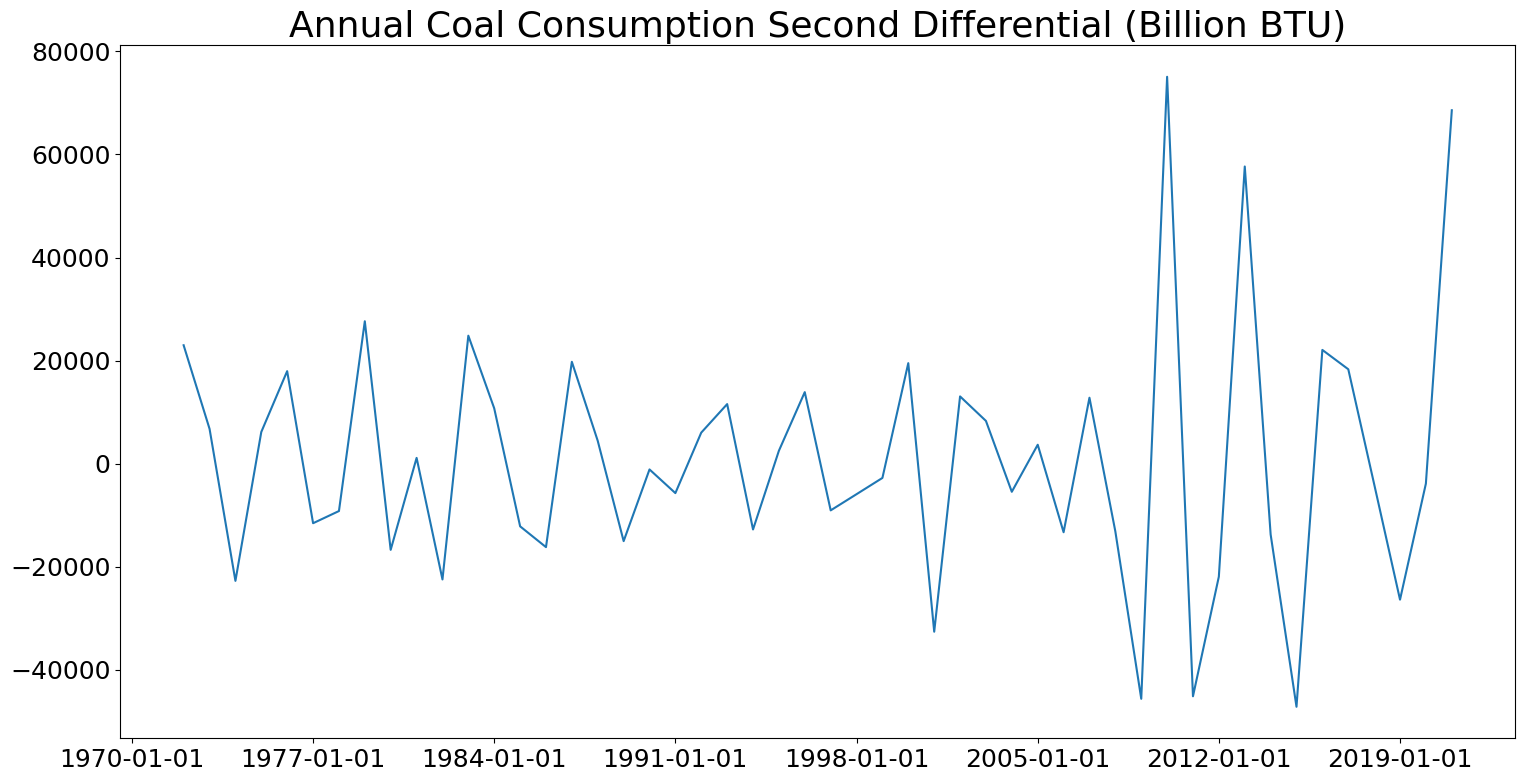

In [145]:
plot_series(df_ts, ['second_diff_Coal_Value'], title='Annual Coal Consumption Second Differential (Billion BTU)', steps = 7)

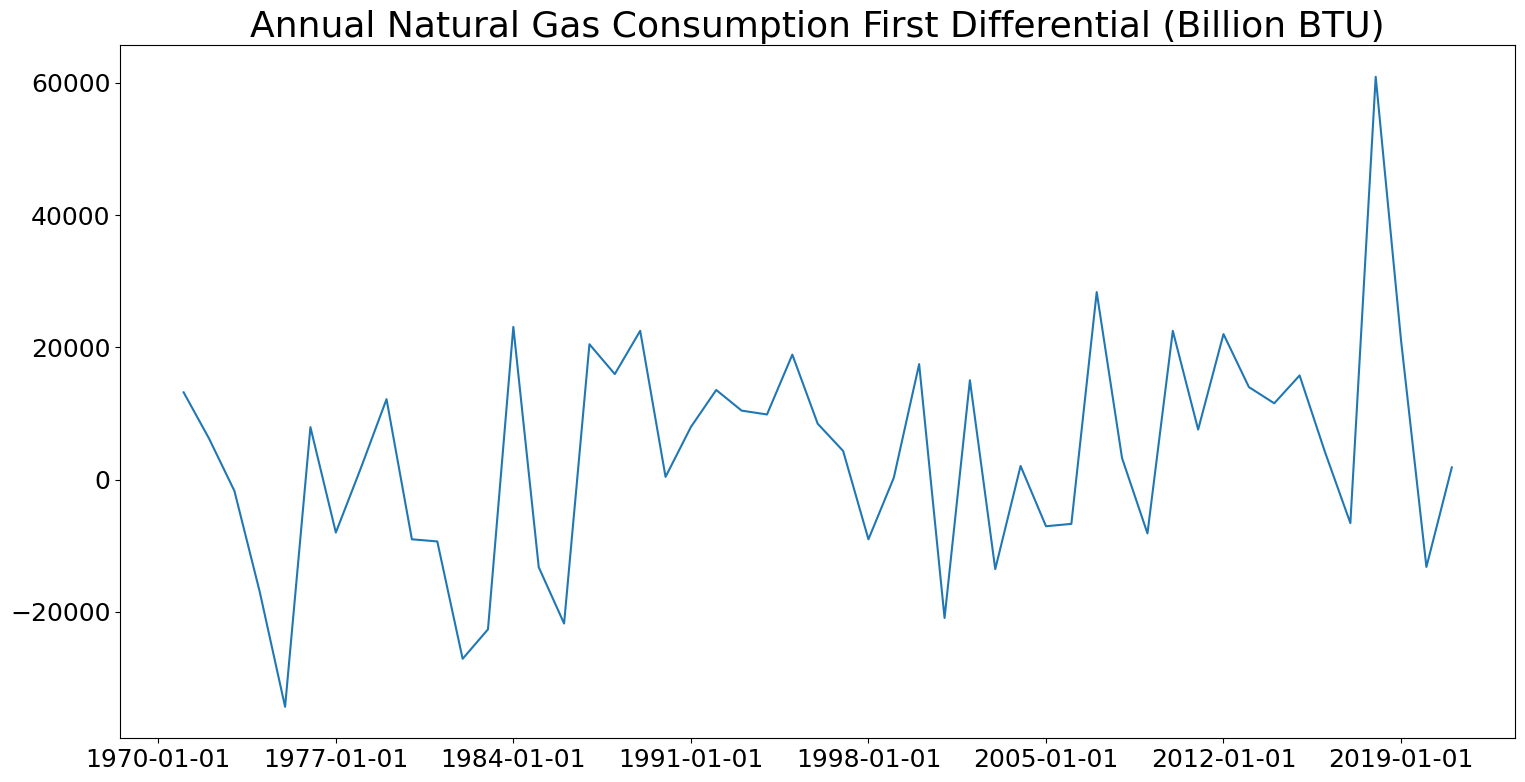

In [146]:
plot_series(df_ts, ['first_diff_Natural_Gas_Value'], title='Annual Natural Gas Consumption First Differential (Billion BTU)', steps = 7)

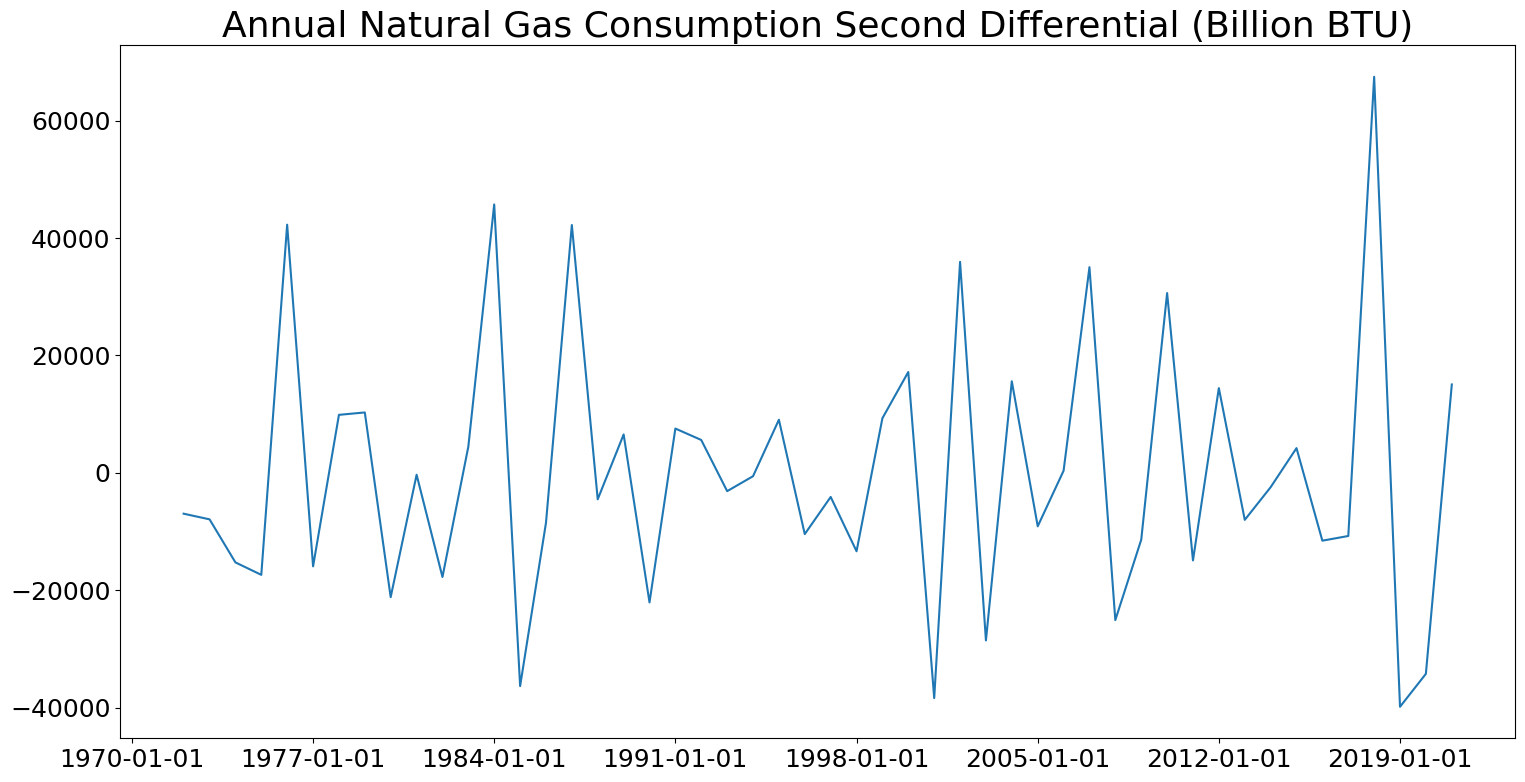

In [147]:
plot_series(df_ts, ['second_diff_Natural_Gas_Value'], title='Annual Natural Gas Consumption Second Differential (Billion BTU)', steps = 7)

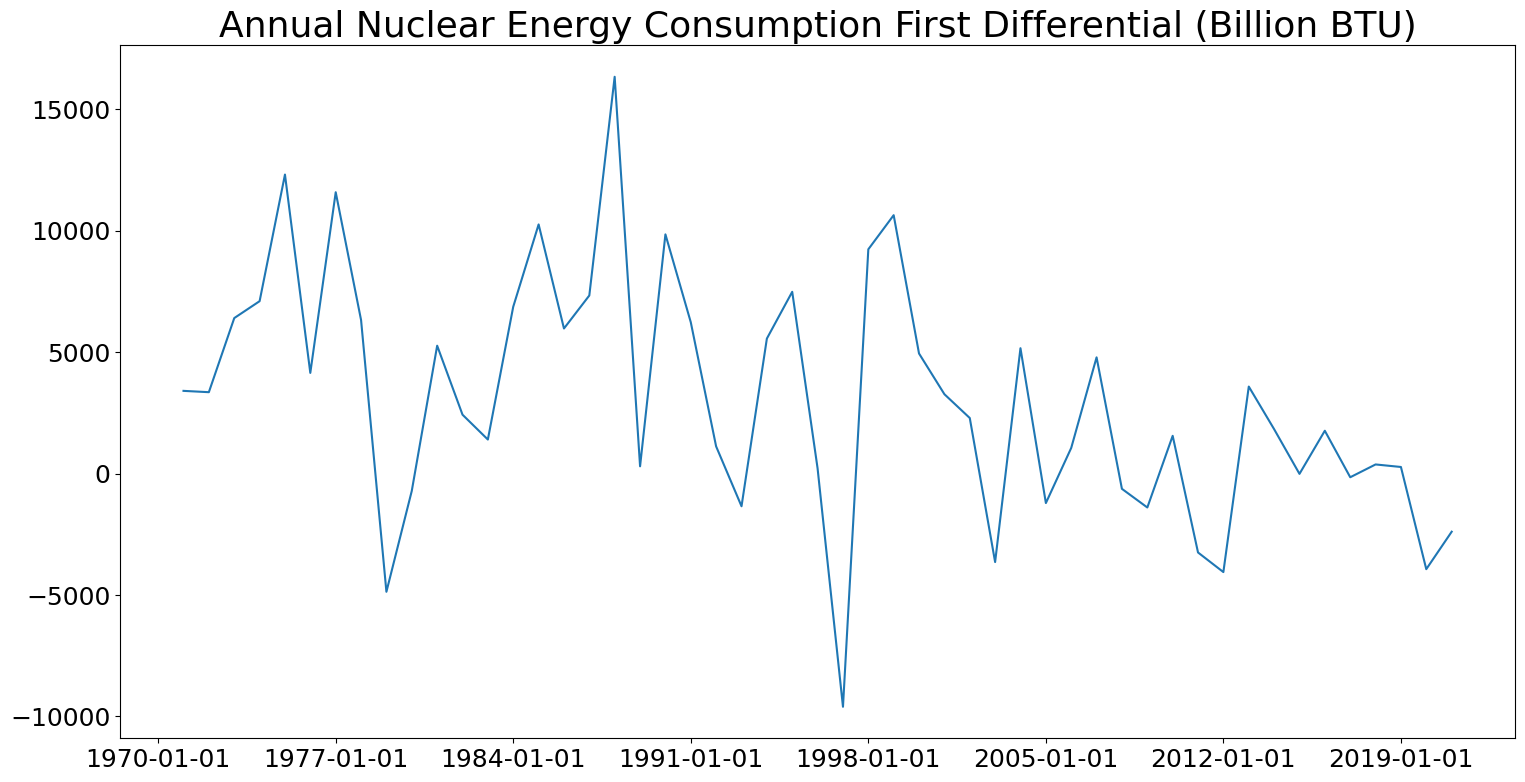

In [148]:
plot_series(df_ts, ['first_diff_Nuclear_Energy_Value'], title='Annual Nuclear Energy Consumption First Differential (Billion BTU)', steps = 7)

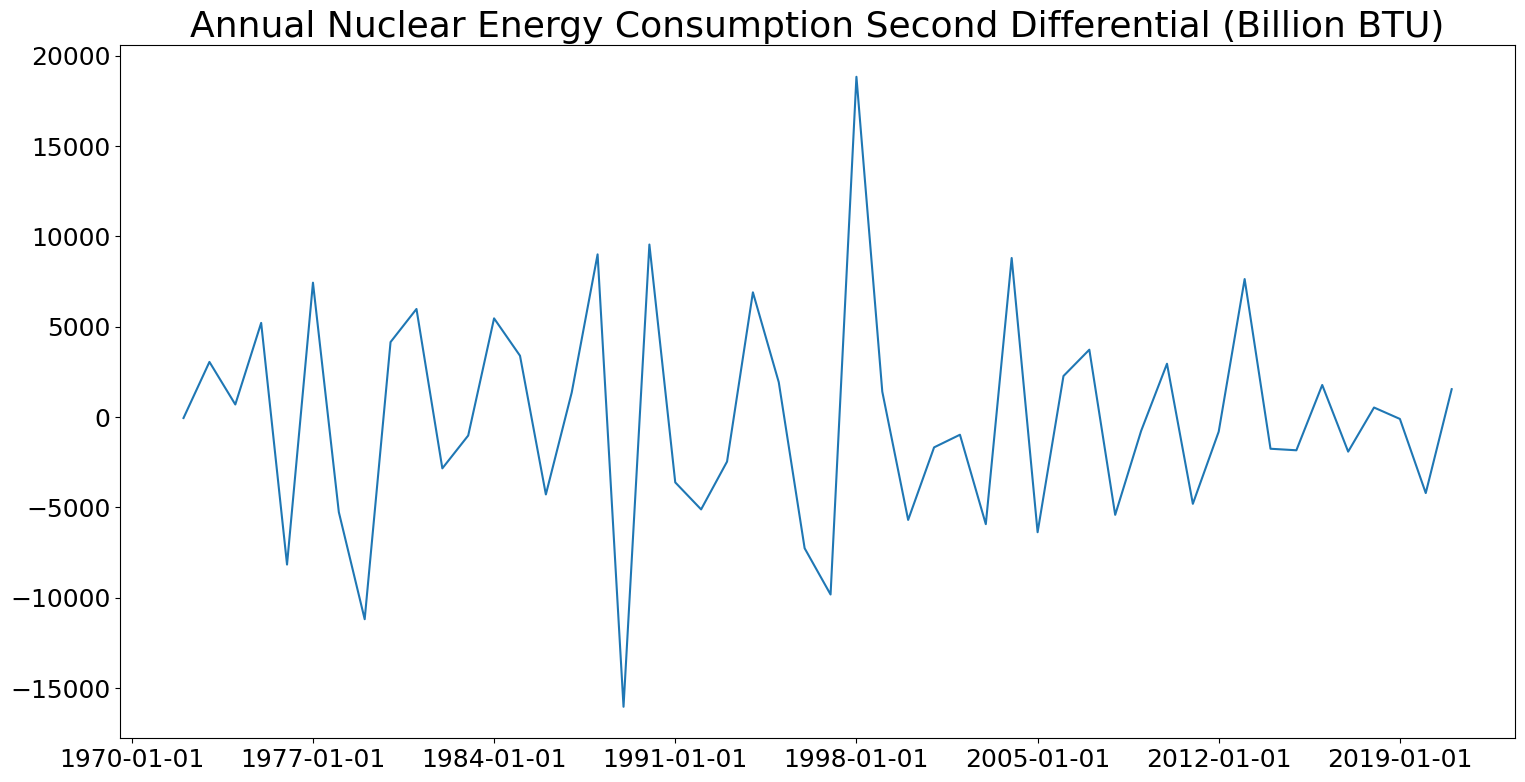

In [149]:
plot_series(df_ts, ['second_diff_Nuclear_Energy_Value'], title='Annual Nuclear Energy Consumption Second Differential (Billion BTU)', steps = 7)

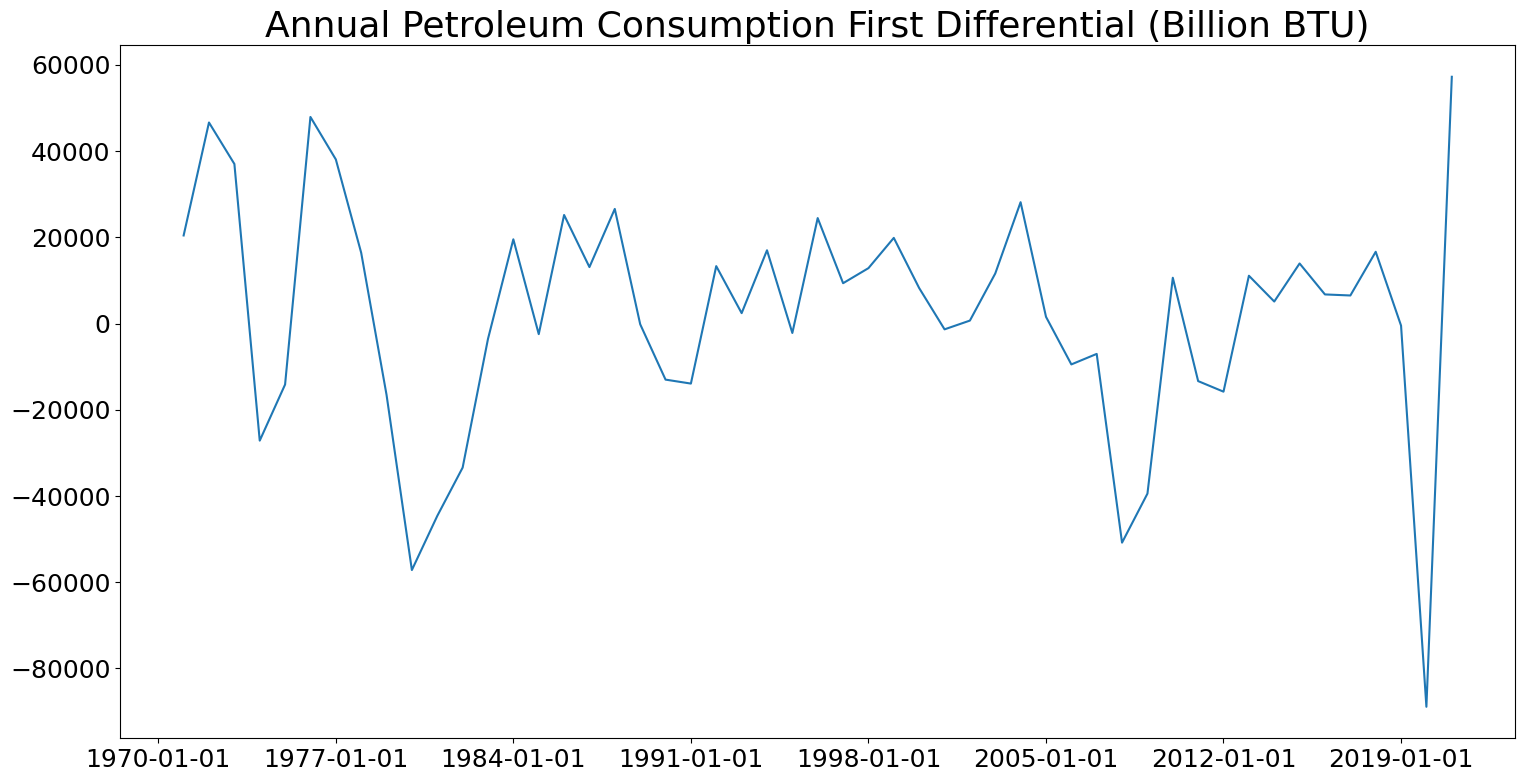

In [150]:
plot_series(df_ts, ['first_diff_Petroleum_Energy_Value'], title='Annual Petroleum Consumption First Differential (Billion BTU)', steps = 7)


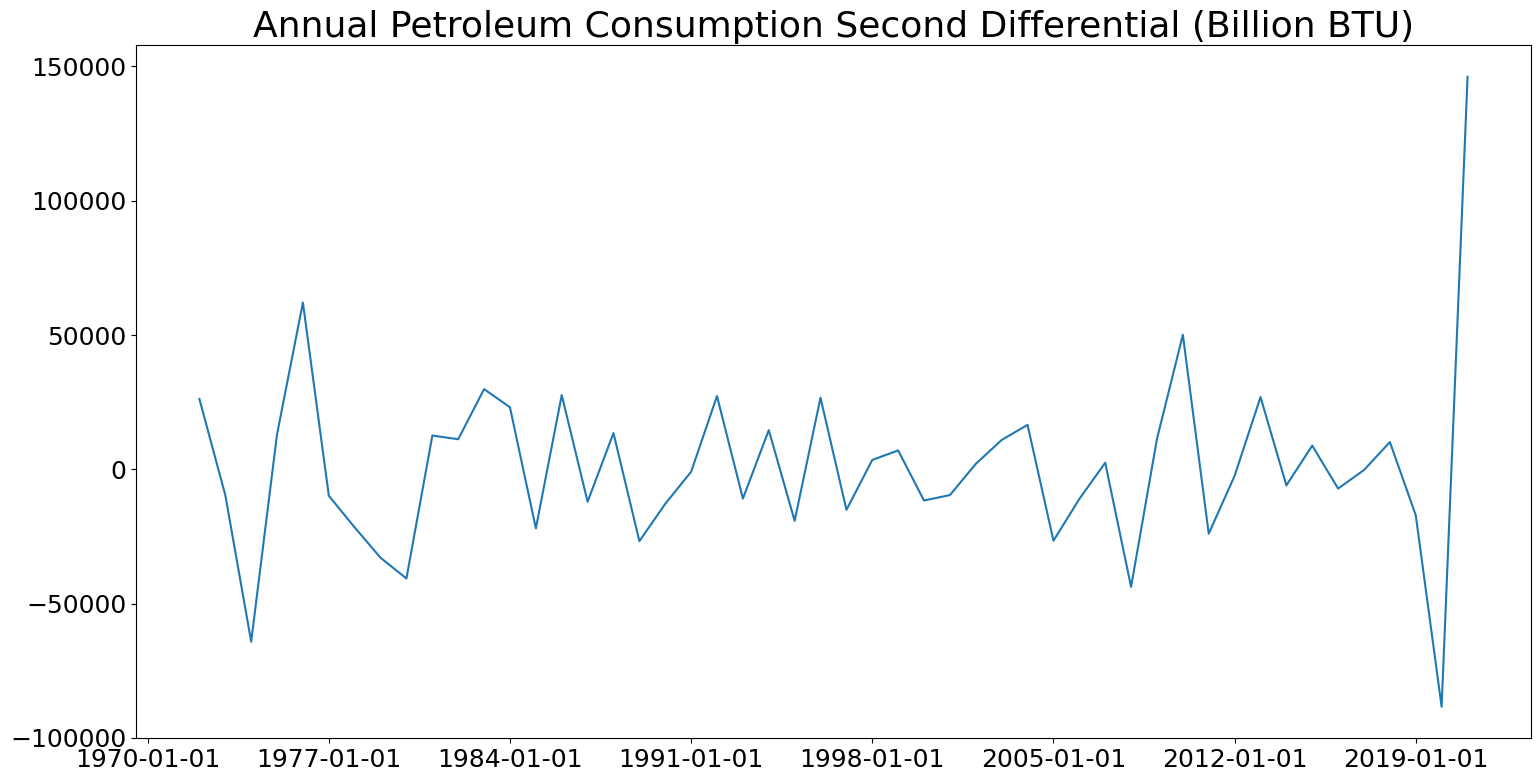

In [151]:
plot_series(df_ts, ['second_diff_Petroleum_Energy_Value'], title='Annual Petroleum Consumption Second Differential (Billion BTU)', steps = 7)

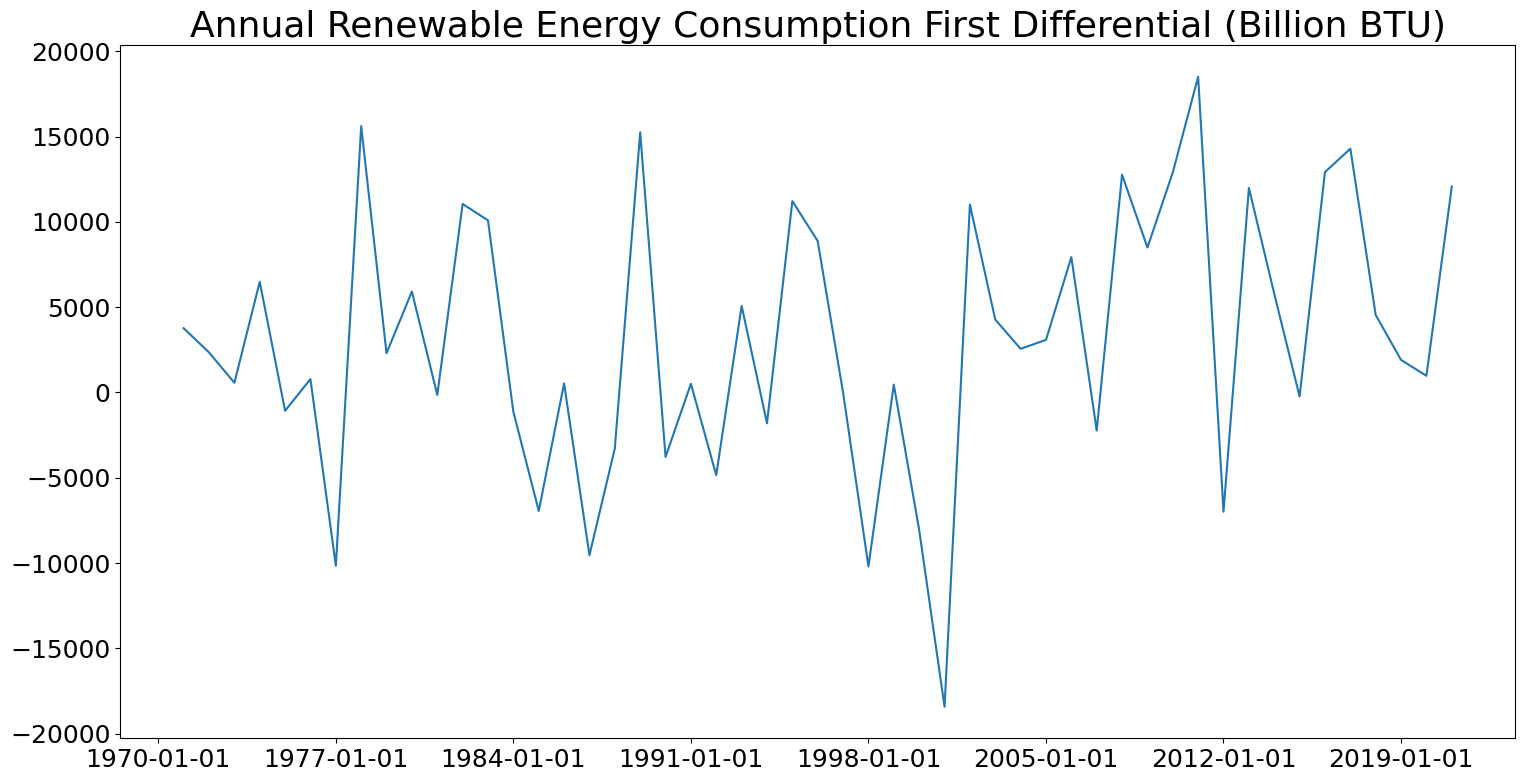

In [152]:
plot_series(df_ts, ['first_diff_Renewable_Energy_Value'], title='Annual Renewable Energy Consumption First Differential (Billion BTU)', steps = 7)


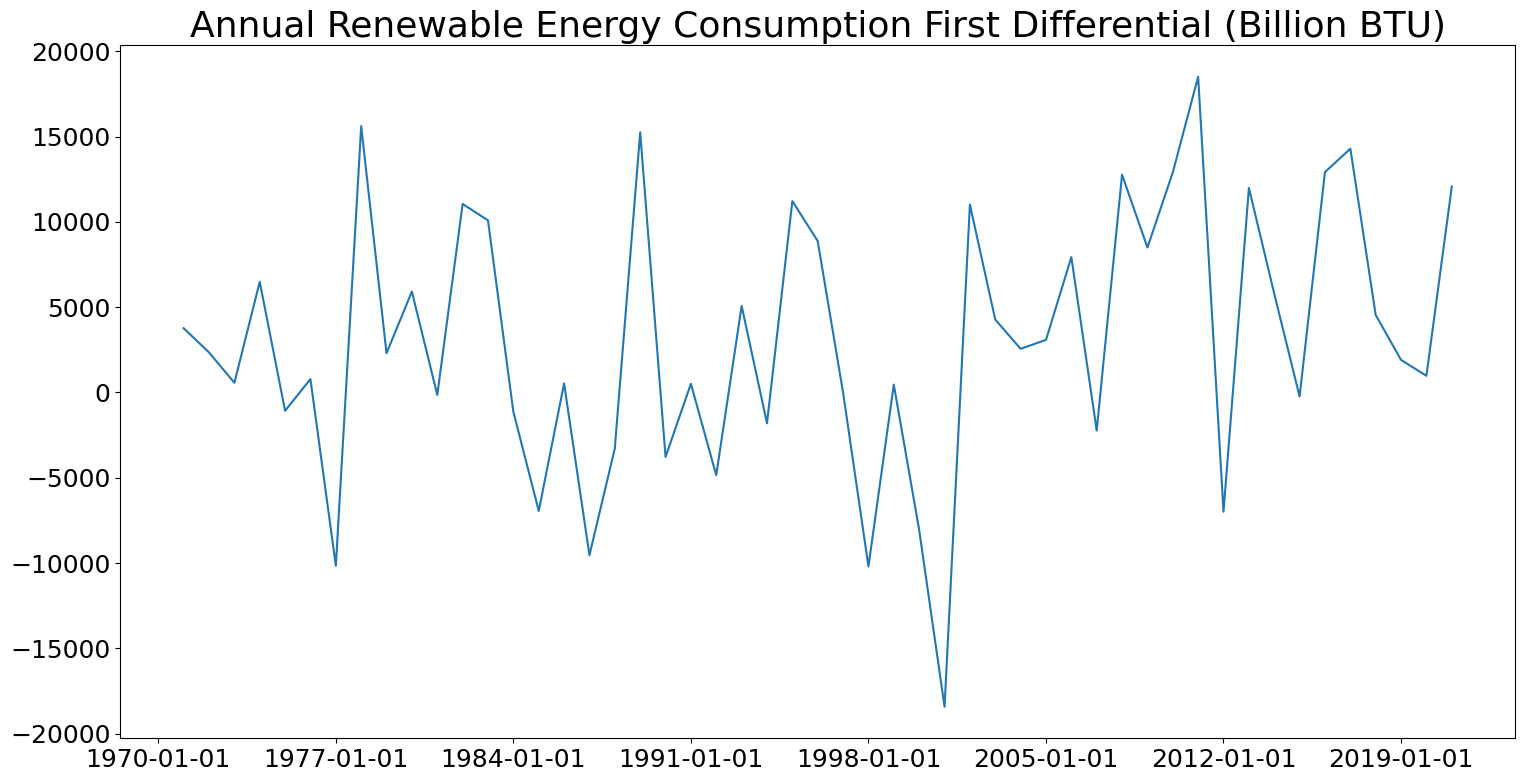

In [153]:
plot_series(df_ts, ['first_diff_Renewable_Energy_Value'], title='Annual Renewable Energy Consumption First Differential (Billion BTU)', steps = 7)


#### Nothing conclusive from plots so we move on to further analysis with Ad Fuller and Modeling

## Ad Fuller Analysis

In [154]:
df_ts.columns

Index(['CO2_Value', 'Coal_Value', 'Natural_Gas_Value', 'Nuclear_Energy_Value',
       'Petroleum_Energy_Value', 'Renewable_Energy_Value',
       'first_diff_CO2_Value', 'second_diff_CO2_Value',
       'first_diff_Coal_Value', 'second_diff_Coal_Value',
       'first_diff_Natural_Gas_Value', 'second_diff_Natural_Gas_Value',
       'first_diff_Nuclear_Energy_Value', 'second_diff_Nuclear_Energy_Value',
       'first_diff_Petroleum_Energy_Value',
       'second_diff_Petroleum_Energy_Value',
       'first_diff_Renewable_Energy_Value',
       'second_diff_Renewable_Energy_Value'],
      dtype='object')

### Interpretation for $\text{CO}_{2}$ 

In [155]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [156]:
interpret_dftest(adfuller(df_ts['CO2_Value']))

Test Statistic   -2.034696
p-value           0.271570
dtype: float64

##### Value for $\alpha$ not less than $0.01$, not stationary so we check first differential. 

In [157]:
interpret_dftest(adfuller(df_ts['first_diff_CO2_Value'].dropna()))

Test Statistic   -3.645985
p-value           0.004940
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for $\text{CO}_{2}$ first differential. 

### Interpretations for Energy Values

In [158]:
interpret_dftest(adfuller(df_ts['Coal_Value']))

Test Statistic   -2.208249
p-value           0.203265
dtype: float64

##### Value for $\alpha$ not less than $0.01$, not stationary so we check first differential. 

In [159]:
interpret_dftest(adfuller(df_ts['first_diff_Coal_Value'].dropna()))

Test Statistic    0.544552
p-value           0.986166
dtype: float64

In [160]:
interpret_dftest(adfuller(df_ts['second_diff_Coal_Value'].dropna()))

Test Statistic   -7.470247e+00
p-value           5.077202e-11
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for coal second differential. 

In [161]:
interpret_dftest(adfuller(df_ts['Natural_Gas_Value']))

Test Statistic    0.945477
p-value           0.993656
dtype: float64

##### Continue process as previously conducted. 

In [162]:
interpret_dftest(adfuller(df_ts['first_diff_Natural_Gas_Value'].dropna()))

Test Statistic   -6.328106e+00
p-value           2.951961e-08
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Natural Gas first differential. 

In [163]:
interpret_dftest(adfuller(df_ts['Nuclear_Energy_Value']))

Test Statistic   -3.416778
p-value           0.010400
dtype: float64

In [164]:
interpret_dftest(adfuller(df_ts['first_diff_Nuclear_Energy_Value'].dropna()))

Test Statistic   -5.226035
p-value           0.000008
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Nuclear Energy first differential. 

In [165]:
interpret_dftest(adfuller(df_ts['Petroleum_Energy_Value']))

Test Statistic   -2.486266
p-value           0.118852
dtype: float64

In [166]:
interpret_dftest(adfuller(df_ts['first_diff_Petroleum_Energy_Value'].dropna()))

Test Statistic   -5.332416
p-value           0.000005
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Petroleum first differential. 

In [167]:
interpret_dftest(adfuller(df_ts['Renewable_Energy_Value']))

Test Statistic    1.130740
p-value           0.995471
dtype: float64

In [168]:
interpret_dftest(adfuller(df_ts['first_diff_Renewable_Energy_Value'].dropna()))

Test Statistic   -6.696366e+00
p-value           3.990237e-09
dtype: float64

##### Value for $\alpha$ less than $0.01$, is stationary for Renewable Energy first differential. 

### Training and ARIMA SARIMA ETC

In [169]:
X_features = ['Coal_Value',	'Natural_Gas_Value','Nuclear_Energy_Value','Petroleum_Energy_Value','Renewable_Energy_Value']

X = df_ts[X_features]
y = df_ts['CO2_Value']

In [170]:
# Create train-test split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = False) # Shuffle = False is IMPORTANT!

In [171]:
# Instantiate model.
model = ARIMA(endog=y_train.astype(float).dropna(),
             order= (0,2,2)) # order (p, d, q)
# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model!


# In the present version of statsmodels, only
# certain values of d are supported.

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [172]:
# Fit model.
arima_0_2_0 = model.fit()

In [173]:
y_test.head()

Year
2011-01-01    22.596078
2012-01-01    21.717647
2013-01-01    21.923529
2014-01-01    21.937255
2015-01-01    21.182353
Name: CO2_Value, dtype: float64

In [174]:
y_test.tail()

Year
2017-01-01    20.449020
2018-01-01    20.994118
2019-01-01    20.294118
2020-01-01    18.319608
2021-01-01    19.354902
Name: CO2_Value, dtype: float64

In [175]:
preds = arima_0_2_0.predict(start = datetime(2011,1,1), end = datetime(2021,1,1))

### Plot this set of predictions

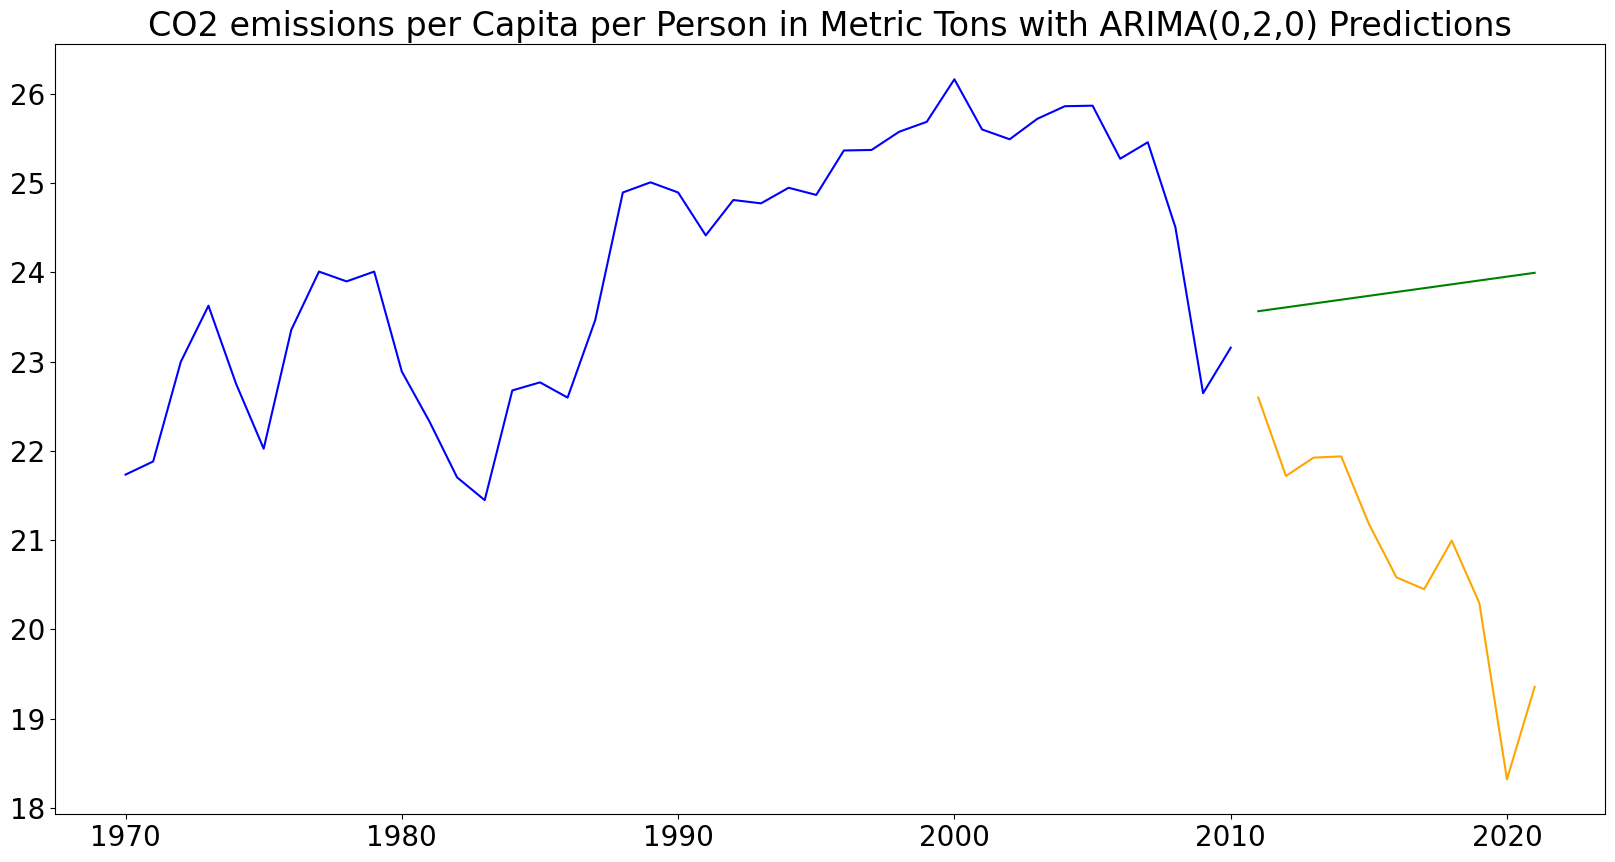

In [176]:
# Plot data.

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

# Set label.
plt.title(label = 'CO2 emissions per Capita per Person in Metric Tons with ARIMA(0,2,0) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

#### Not very successful in terms of predicting the trend. 

In [177]:
print(math.sqrt(mean_squared_error(y_test, preds)))


3.208383621037967


In [178]:
arima_0_2_0.aic

87.203911768643

#### Examine plots for adequate value of q


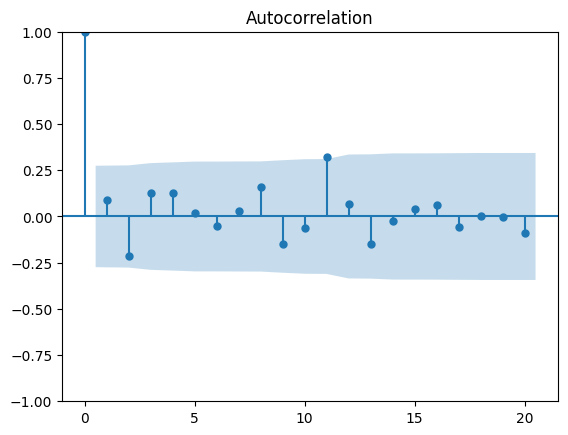

In [179]:
plot_acf(df_ts['first_diff_CO2_Value'].dropna(), lags=20);

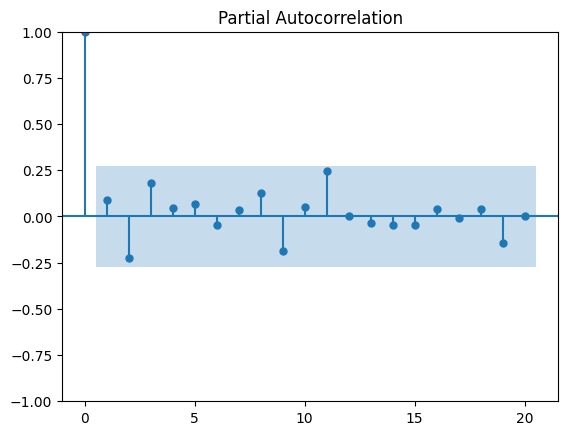

In [180]:
plot_pacf(df_ts['first_diff_CO2_Value'].dropna(), lags=20);

$q = 2$ will work as we see our $\text{acf}$ and $\text{pacf}$ plots fit this trend: 

- The ACF quickly decays into "insignificance." (Has a sharp drop.)
- The second lag in the ACF is negative.
- The last lag in the ACF that is positive that is closest to 1 is 1.
- Thus, we should set $q=2$.

In [181]:
# Instantiate model.

# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model!
model = ARIMA(endog=y_train.astype(float).dropna(), order = (0, 2, 2))


# Fit model.
arima_0_2_2 = model.fit()


# Generate predictions.
preds = arima_0_2_2.predict(start = datetime(2011,1,1), end = datetime(2021,1,1))

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


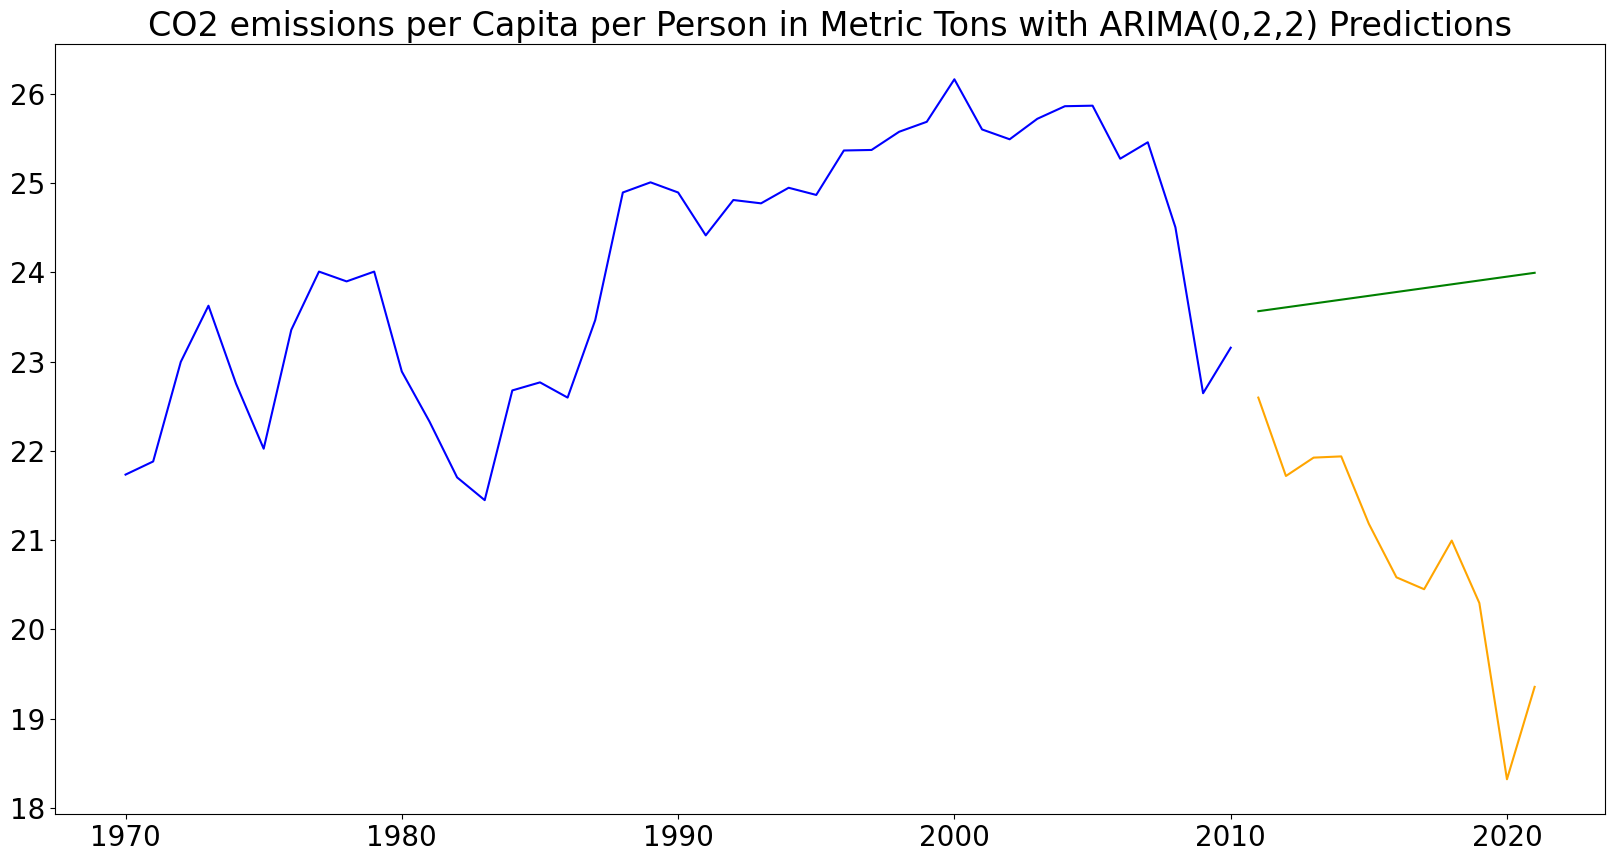

In [182]:
# Plot data.

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data. 
plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

# Set label.
plt.title(label = 'CO2 emissions per Capita per Person in Metric Tons with ARIMA(0,2,2) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [183]:
print(math.sqrt(mean_squared_error(y_test, preds)))

3.208383621037967


In [184]:
arima_0_2_2.aic

87.203911768643

### SARIMAX MODEL

Seasonality with a 4 season approach tried first based on domain-knowledge. 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00676D+00    |proj g|=  4.53629D-02

At iterate    5    f=  9.97402D-01    |proj g|=  2.55934D-02

At iterate   10    f=  9.90046D-01    |proj g|=  7.42426D-03

At iterate   15    f=  9.89265D-01    |proj g|=  3.11143D-03

At iterate   20    f=  9.89170D-01    |proj g|=  1.31541D-03

At iterate   25    f=  9.89155D-01    |proj g|=  1.76808D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     53      1     0     0   

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


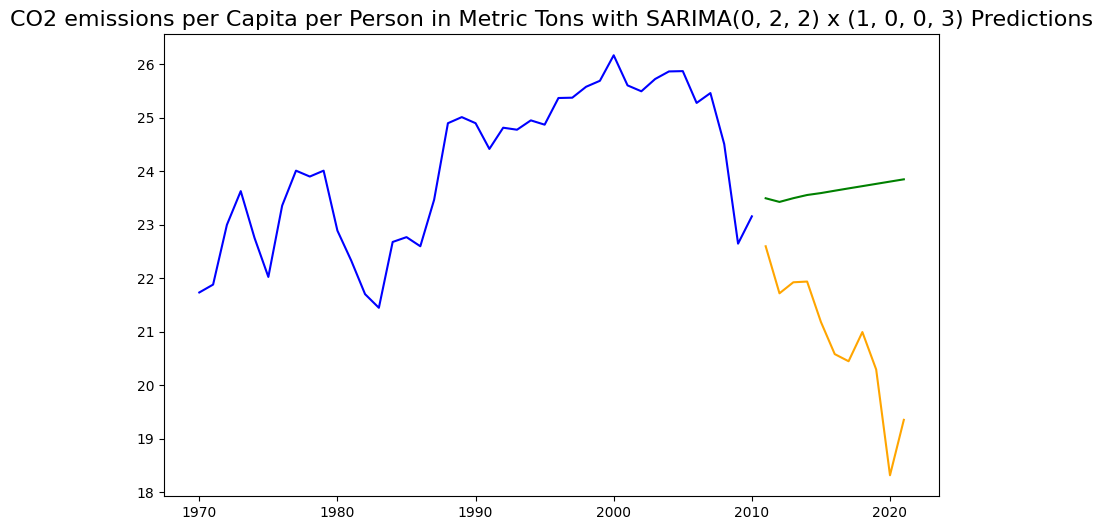

In [185]:
# Fit a SARIMA(0, 2, 2) x (1, 0, 0, 3) model.
sarima = SARIMAX(endog=y_train.astype(float).dropna(), 
                 order=(0,2,2),
                seasonal_order=(1,0,0,3))

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict(start = datetime(2011,1,1), end = datetime(2021,1,1))

# Evaluate predictions.


# Plot data.
plt.figure(figsize=(10,6))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'CO2 emissions per Capita per Person in Metric Tons with SARIMA(0, 2, 2) x (1, 0, 0, 3) Predictions', fontsize=16)
plt.show();

In [186]:
model.aic

89.1104578817365

### Try 6 seasonality

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00509D+00    |proj g|=  5.45861D-02

At iterate    5    f=  9.95609D-01    |proj g|=  2.02701D-02

At iterate   10    f=  9.89889D-01    |proj g|=  9.31042D-03

At iterate   15    f=  9.89368D-01    |proj g|=  3.13492D-03

At iterate   20    f=  9.89326D-01    |proj g|=  8.93000D-04

At iterate   25    f=  9.89322D-01    |proj g|=  4.77253D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     39      1     0     0   

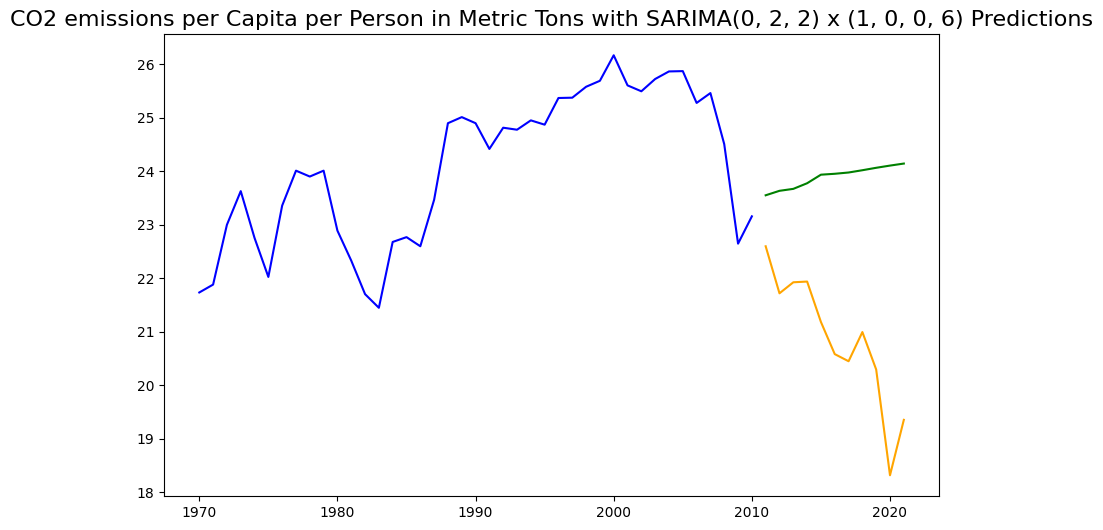

In [187]:
# Fit a SARIMA(0, 2, 2) x (1, 0, 0, 6) model.
sarima = SARIMAX(endog=y_train.astype(float).dropna(), 
                 order=(0,2,2),
                seasonal_order=(1,0,0,6))

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict(start = datetime(2011,1,1), end = datetime(2021,1,1))

# Evaluate predictions.


# Plot data.
plt.figure(figsize=(10,6))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'CO2 emissions per Capita per Person in Metric Tons with SARIMA(0, 2, 2) x (1, 0, 0, 6) Predictions', fontsize=16)
plt.show();

In [188]:
model.aic

89.12437003105553

#### Going with four seasons performed slightly better according to AIC score, proceed with four seasons. 

### Try to introduce some lag 

In [189]:
df_ts.tail()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value,first_diff_CO2_Value,second_diff_CO2_Value,first_diff_Coal_Value,second_diff_Coal_Value,first_diff_Natural_Gas_Value,second_diff_Natural_Gas_Value,first_diff_Nuclear_Energy_Value,second_diff_Nuclear_Energy_Value,first_diff_Petroleum_Energy_Value,second_diff_Petroleum_Energy_Value,first_diff_Renewable_Energy_Value,second_diff_Renewable_Energy_Value
Year,,,,,,,,,,,,,,,,,,
2017-01-01,20.449020,271365.274510,550135.117647,165077.823529,706741.784314,218337.686275,-0.133333,0.466667,-7598.274510,18320.176471,-6586.215686,-10764.725490,-152.568627,-1914.568627,6499.686275,-243.352941,14295.411765,1377.549020
2018-01-01,20.994118,259803.117647,611044.078431,165452.313725,723378.137255,222877.705882,0.545098,0.678431,-11562.156863,-3963.882353,60908.960784,67495.176471,374.490196,527.058824,16636.352941,10136.666667,4540.019608,-9755.392157
2019-01-01,20.294118,221861.294118,632081.921569,165722.588235,722886.980392,224785.313725,-0.700000,-1.245098,-37941.823529,-26379.666667,21037.843137,-39871.117647,270.274510,-104.215686,-491.156863,-17127.509804,1907.607843,-2632.411765
2020-01-01,18.319608,180052.882353,618863.352941,161785.764706,633989.980392,225762.313725,-1.974510,-1.274510,-41808.411765,-3866.588235,-13218.568627,-34256.411765,-3936.823529,-4207.098039,-88897.000000,-88405.843137,977.000000,-930.607843
2021-01-01,19.354902,206818.941176,620704.274510,159391.254902,691215.274510,237840.627451,1.035294,3.009804,26766.058824,68574.470588,1840.921569,15059.490196,-2394.509804,1542.313725,57225.294118,146122.294118,12078.313725,11101.313725


In [190]:
# Define columns to lag
columns_to_lag = ['Coal_Value', 'Natural_Gas_Value', 'Nuclear_Energy_Value',
                  'Petroleum_Energy_Value', 'Renewable_Energy_Value']

# Create lag features for the specified columns
for column in columns_to_lag:
    for i in range(1, 4):  # Adjust the number of lags as needed
        lag_col_name = f"{column}_lag_{i}"
        df_ts[lag_col_name] = df_ts[column].shift(i)

# Drop rows with NaN values (resulting from shifting)
df_ts = df_ts.dropna()

# Splitting Data into test and training sets manually
train = df_ts.loc['1970':'2018']
test = df_ts.loc['2019':'2020']

# Define endogenous and exogenous data
endog_train = train['CO2_Value']
exog_train = train[columns_to_lag]

endog_test = test['CO2_Value']
exog_test = test[columns_to_lag]

In [191]:
print(endog_train.shape)
print(exog_train.shape)

(46,)
(46, 5)


In [192]:
print(endog_test.shape)
print(exog_test.shape)

(2,)
(2, 5)


In [205]:
# Define and fit the model with training data
model = sm.tsa.statespace.SARIMAX(endog=endog_train,
                                  order=(0, 2, 2),
                                  seasonal_order=(0, 0, 0, 3),
                                  exog=exog_train,
                                  time_varying_regression=True,
                                  mle_regression=False)
model_fit = model.fit(disp=False, maxiter=30000)

# Forecasting out-of-sample data with exogenous data
forecast = model_fit.forecast(steps=len(test), exog=exog_test)
print(forecast)

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2019-01-01    20.539149
2020-01-01    19.447708
Freq: AS-JAN, Name: predicted_mean, dtype: float64


574.5121502680087


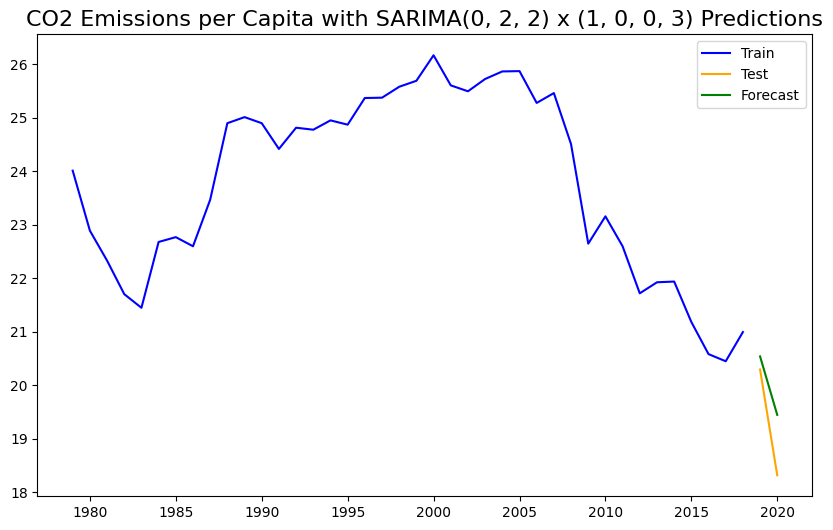

In [206]:
# Evaluate predictions.
print(model_fit.aic)

# Plot data.
plt.figure(figsize=(10, 6))
plt.plot(train['CO2_Value'], color='blue', label='Train')
plt.plot(test['CO2_Value'], color='orange', label='Test')
plt.plot(forecast, color='green', label='Forecast')
plt.title('CO2 Emissions per Capita with SARIMA(0, 2, 2) x (1, 0, 0, 3) Predictions', fontsize=16)
plt.legend()
plt.show()


In [207]:
# Calculate residuals
residuals = test['CO2_Value'] - forecast

# Calculate mean squared error
mse = mean_squared_error(test['CO2_Value'], forecast)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.8162874294539993


#### This performed better than all other models in terms of our error metric and accuracy. 

##### Convergence errors and oversimplification lead us to continue onward. 

In [231]:
# Starting AIC and (P, D, Q, S).
best_aic = np.inf
final_P, final_D, final_Q, final_S = 0, 0, 0, 0

# Define columns to lag
columns_to_lag = ['Coal_Value', 'Natural_Gas_Value', 'Nuclear_Energy_Value',
                  'Petroleum_Energy_Value', 'Renewable_Energy_Value']

# Create lag features for the specified columns
for column in columns_to_lag:
    for i in range(1, 4):  # Adjust the number of lags as needed
        lag_col_name = f"{column}_lag_{i}"
        df_ts[lag_col_name] = df_ts[column].shift(i)

# Drop rows with NaN values (resulting from shifting)
df_ts = df_ts.dropna()

# Splitting Data into test and training sets manually
train = df_ts.loc['1970':'2018']
test = df_ts.loc['2019':'2020']

# Define endogenous and exogenous data
endog_train = train['CO2_Value']
exog_train = train[[f"{col}_lag_{i}" for col in columns_to_lag for i in range(1, 4)]]

endog_test = test['CO2_Value']
exog_test = test[[f"{col}_lag_{i}" for col in columns_to_lag for i in range(1, 4)]]

for P in range(3):
    for Q in range(3):
        for D in range(3):
            for S in range(0, 13, 4):
                try:
                    print(f'Attempting to fit SARIMAX(0,2,2)x({P},{D},{Q},{S})')
                    
                    # Instantiate SARIMAX model.
                    sarimax = SARIMAX(endog=endog_train,
                                      order=(0, 2, 2),
                                      seasonal_order=(P, D, Q, S),
                                      exog=exog_train) 
 
                    # Fit SARIMAX model.
                    model = sarimax.fit()

                    # Generate predictions based on test set.
                    preds = model.predict(start=datetime(2019, 1, 1),
                                          end=datetime(2020, 1, 1),
                                          exog=exog_test)

                    # Evaluate predictions.
                    mse = mean_squared_error(endog_test, preds)
                    print(f'The MSE for (0, 2, 2)x({P},{D},{Q},{S}) is: {mse}')

                    # Save for final report.
                    if best_aic > model.aic:
                        best_aic = model.aic
                        final_P, final_D, final_Q, final_S = P, D, Q, S

                except Exception as e:
                    print(f'Error fitting model: {e}')

print(f'Our model that minimizes AIC on the testing data is the SARIMAX(0, 2, 2)x({final_P},{final_D},{final_Q},{final_S}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit SARIMAX(0,2,2)x(0,0,0,0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747903996     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,0,0) is: 0.5130455060256995
Attempting to fit SARIMAX(0,2,2)x(0,0,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747903996     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,0,4) is: 0.5130455060256995
Attempting to fit SARIMAX(0,2,2)x(0,0,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747903996     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,0,8) is: 0.5130455060256995
Attempting to fit SARIMAX(0,2,2)x(0,0,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747903996     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,0,12) is: 0.5130455060256995
Attempting to fit SARIMAX(0,2,2)x(0,1,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(0,1,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      2     54      2     0     0   1.731D+05  -1.130D-01
  F = -0.11304065659471642     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,0,4) is: 0.4701350218643074
Attempting to fit SARIMAX(0,2,2)x(0,1,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      2     49      2     0     0   2.354D+06  -4.501D-01
  F = -0.45010500893126332     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,0,8) is: 0.1604599152644039
Attempting to fit SARIMAX(0,2,2)x(0,1,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05
  ys=-5.050E-08  -gs= 1.891E-03 BFGS update SKIPPED
  ys=-1.684E-10  -gs= 2.033E-05 BFGS update


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      4     78      2     2     0   2.187D+08  -2.287D+00
  F =  -2.2872320166522693     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,0,12) is: 5.554424517653213
Attempting to fit SARIMAX(0,2,2)x(0,2,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(0,2,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At i

 This problem is unconstrained.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/st

The MSE for (0, 2, 2)x(0,2,0,4) is: 0.7940037504646356
Attempting to fit SARIMAX(0,2,2)x(0,2,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08595D-01    |proj g|=  3.47694D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,2,0,8) is: 0.6319283543727864
Attempting to fit SARIMAX(0,2,2)x(0,2,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      2     48      2     0     0   4.087D+04   3.194D-01
  F =  0.31940552895045549     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,1,4) is: 0.6969613965485424
Attempting to fit SARIMAX(0,2,2)x(0,0,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900748828545     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,1,8) is: 0.5130455068490554
Attempting to fit SARIMAX(0,2,2)x(0,0,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900748664288     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,1,12) is: 0.5130455065189268
Attempting to fit SARIMAX(0,2,2)x(0,1,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(0,1,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      2     55      2     0     0   2.094D+05  -1.575D-01
  F = -0.15753177757005873     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,1,4) is: 0.5517052507884449
Attempting to fit SARIMAX(0,2,2)x(0,1,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      2     49      2     0     0   2.354D+06  -4.501D-01
  F = -0.45010490125676755     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,1,8) is: 0.1604599143605686
Attempting to fit SARIMAX(0,2,2)x(0,1,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05
  ys=-5.491E-08  -gs= 2.206E-03 BFGS update SKIPPED
  ys=-2.571E-12  -gs= 7.600E-07 BFGS update


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      5     95      2     3     0   2.187D+08  -2.287D+00
  F =  -2.2872320915728461     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,1,12) is: 5.554424716080243
Attempting to fit SARIMAX(0,2,2)x(0,2,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(0,2,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At i

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point afte


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,2,1,8) is: 0.6319283543727864
Attempting to fit SARIMAX(0,2,2)x(0,2,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      1     21      1     0     0   5.781D+11  -3.184D-01
  F = -0.31839325127419738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,2,1,12) is: 5.120484031217258
Attempting to fit SARIMAX(0,2,2)x(0,0,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(0,0,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900748006586     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,2,4) is: 0.5130455063214299
Attempting to fit SARIMAX(0,2,2)x(0,0,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747773301     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,2,8) is: 0.5130455061650318
Attempting to fit SARIMAX(0,2,2)x(0,0,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900748404712     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,0,2,12) is: 0.5130455063509345
Attempting to fit SARIMAX(0,2,2)x(0,1,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(0,1,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At 

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization faile


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     54      2     0     0   1.731D+05  -1.130D-01
  F = -0.11304065659476166     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,2,4) is: 0.4701350218487673
Attempting to fit SARIMAX(0,2,2)x(0,1,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     49      2     0     0   2.354D+06  -4.501D-01
  F = -0.45010490160940175     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,2,8) is: 0.16045991475180876
Attempting to fit SARIMAX(0,2,2)x(0,1,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


  ys=-5.718E-08  -gs= 1.891E-03 BFGS update SKIPPED
  ys=-3.353E-12  -gs= 6.545E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     79      2     2     0   2.188D+08  -2.287D+00
  F =  -2.2872323622953847     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,1,2,12) is: 5.554424512021466
Attempting to fit SARIMAX(0,2,2)x(0,2,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(0,2,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At i

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08595D-01    |proj g|=  3.47694D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,2,2,8) is: 0.6319283543727844
Attempting to fit SARIMAX(0,2,2)x(0,2,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      1     21      1     0     0   5.781D+11  -3.184D-01
  F = -0.31839325127419738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(0,2,2,12) is: 5.120484031217258
Attempting to fit SARIMAX(0,2,2)x(1,0,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,0,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      4     66      2     0     0   4.321D+04   3.130D-01
  F =  0.31300651901277049     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,0,4) is: 0.51603254372445
Attempting to fit SARIMAX(0,2,2)x(1,0,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65159D-01    |proj g|=  6.16422D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      2     44      2     0     0   4.304D+04   2.428D-01
  F =  0.24278080473583205     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,0,8) is: 0.7571773626660819
Attempting to fit SARIMAX(0,2,2)x(1,0,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17471D-01    |proj g|=  4.58943D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      3     61      2     0     0   4.324D+04   3.117D-01
  F =  0.31166724487134229     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,0,12) is: 0.5058934335140437
Attempting to fit SARIMAX(0,2,2)x(1,1,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,1,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      2     53      2     0     0   3.832D+05  -2.374D-01
  F = -0.23742881458435577     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,0,4) is: 1.0152665667105762
Attempting to fit SARIMAX(0,2,2)x(1,1,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.13986D-01    |proj g|=  2.45743D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      2     51      2     0     0   2.155D+06  -4.348D-01
  F = -0.43478920470819021     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,0,8) is: 0.12976027298781567
Attempting to fit SARIMAX(0,2,2)x(1,1,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05
  ys=-1.466E-07  -gs= 3.822E-03 BFGS update SKIPPED
  ys=-9.002E-12  -gs= 3.551E-06 BFGS updat


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      5     98      2     3     0   2.188D+08  -2.287D+00
  F =  -2.2872328303951663     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,0,12) is: 5.554425089856942
Attempting to fit SARIMAX(0,2,2)x(1,2,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,2,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At i

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      2     54      2     0     0   8.968D+06  -7.733D-01
  F = -0.77333648297165980     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,0,4) is: 0.743966087899324
Attempting to fit SARIMAX(0,2,2)x(1,2,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.03320D-01    |proj g|=  2.89867D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      1     21      1     0     0   2.899D+12  -7.033D-01
  F = -0.70332015994654162     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,0,8) is: 0.6319283543727818
Attempting to fit SARIMAX(0,2,2)x(1,2,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      1     21      1     0     0   5.781D+11  -3.184D-01
  F = -0.31839325127419738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,0,12) is: 5.120484031217258
Attempting to fit SARIMAX(0,2,2)x(1,0,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,0,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     48      2     0     0   4.091D+04   3.189D-01
  F =  0.31889703056358520     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,1,4) is: 0.6960415558180069
Attempting to fit SARIMAX(0,2,2)x(1,0,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83416D-01    |proj g|=  8.66104D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      3     54      2     0     0   5.032D+04   2.636D-01
  F =  0.26356747880102044     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,1,8) is: 0.9701891643963898
Attempting to fit SARIMAX(0,2,2)x(1,0,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900748158015     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,1,12) is: 0.5130455061941255
Attempting to fit SARIMAX(0,2,2)x(1,1,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,1,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     50      2     0     0   2.568D+05  -2.167D-01
  F = -0.21665601220627964     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,1,4) is: 0.7045298317022437
Attempting to fit SARIMAX(0,2,2)x(1,1,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     49      2     0     0   2.354D+06  -4.501D-01
  F = -0.45010490382292329     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,1,8) is: 0.1604599180869214
Attempting to fit SARIMAX(0,2,2)x(1,1,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05
  ys=-4.618E-08  -gs= 1.891E-03 BFGS update SKIPPED
  ys=-1.941E-10  -gs= 1.973E-05 BFGS update


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     78      2     2     0   2.188D+08  -2.287D+00
  F =  -2.2872319482811529     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,1,12) is: 5.554424517441205
Attempting to fit SARIMAX(0,2,2)x(1,2,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,2,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     57      2     0     0   8.671D+06  -7.739D-01
  F = -0.77392127315189774     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,1,4) is: 0.7521415468340846
Attempting to fit SARIMAX(0,2,2)x(1,2,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08595D-01    |proj g|=  3.47694D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,1,8) is: 0.6319283543727864
Attempting to fit SARIMAX(0,2,2)x(1,2,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      1     21      1     0     0   5.781D+11  -3.184D-01
  F = -0.31839325127419738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,1,12) is: 5.120484031217258
Attempting to fit SARIMAX(0,2,2)x(1,0,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,0,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      2     49      2     0     0   4.448D+04   3.139D-01
  F =  0.31393258527759837     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,2,4) is: 0.5051928805468789
Attempting to fit SARIMAX(0,2,2)x(1,0,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747830827     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,2,8) is: 0.5130455064267931
Attempting to fit SARIMAX(0,2,2)x(1,0,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900748367015     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,0,2,12) is: 0.5130455063279054
Attempting to fit SARIMAX(0,2,2)x(1,1,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,1,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      2     54      2     0     0   1.731D+05  -1.130D-01
  F = -0.11304065659482639     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,2,4) is: 0.47013502186441547
Attempting to fit SARIMAX(0,2,2)x(1,1,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


  ys=-1.482E-07  -gs= 3.381E-03 BFGS update SKIPPED
  ys=-2.823E-17  -gs= 8.412E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      4     81      2     2     0   2.188D+08  -2.287D+00
  F =  -2.2872316153755010     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,1,2,12) is: 5.5544249387783875
Attempting to fit SARIMAX(0,2,2)x(1,2,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(1,2,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At 

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      1     21      1     0     0   4.863D+06  -6.117D-01
  F = -0.61171828201184630     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,2,4) is: 0.7940037504645571
Attempting to fit SARIMAX(0,2,2)x(1,2,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08595D-01    |proj g|=  3.47694D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,2,8) is: 0.6319283543727844
Attempting to fit SARIMAX(0,2,2)x(1,2,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      1     21      1     0     0   5.781D+11  -3.184D-01
  F = -0.31839325127419738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(1,2,2,12) is: 5.120484031217258
Attempting to fit SARIMAX(0,2,2)x(2,0,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,0,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     44      2     0     0   4.322D+04   2.445D-01
  F =  0.24451136919543057     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,0,4) is: 0.7579699514404814
Attempting to fit SARIMAX(0,2,2)x(2,0,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63805D-01    |proj g|=  6.01396D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     44      2     0     0   4.325D+04   2.366D-01
  F =  0.23664886962782297     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,0,8) is: 0.6785499635205318
Attempting to fit SARIMAX(0,2,2)x(2,0,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747796443     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,0,12) is: 0.5130455059555672
Attempting to fit SARIMAX(0,2,2)x(2,1,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,1,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     50      2     0     0   4.932D+05  -2.346D-01
  F = -0.23464608890313984     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,0,4) is: 1.3147049033159979
Attempting to fit SARIMAX(0,2,2)x(2,1,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     49      2     0     0   2.354D+06  -4.501D-01
  F = -0.45010490140513454     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,0,8) is: 0.16045991488324898
Attempting to fit SARIMAX(0,2,2)x(2,1,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05
  ys=-5.590E-08  -gs= 1.891E-03 BFGS update SKIPPED
  ys=-5.679E-13  -gs= 6.112E-07 BFGS updat


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      4     79      2     2     0   2.187D+08  -2.287D+00
  F =  -2.2872318839251498     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,0,12) is: 5.5544245120103515
Attempting to fit SARIMAX(0,2,2)x(2,2,0,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,2,0,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      2     53      2     0     0   1.057D+07  -8.042D-01
  F = -0.80416537445561598     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,0,4) is: 0.8056905805870305
Attempting to fit SARIMAX(0,2,2)x(2,2,0,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08595D-01    |proj g|=  3.47694D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,0,8) is: 0.6319283543727844
Attempting to fit SARIMAX(0,2,2)x(2,2,0,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      1     21      1     0     0   5.781D+11  -3.184D-01
  F = -0.31839325127419738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,0,12) is: 5.120484031217258
Attempting to fit SARIMAX(0,2,2)x(2,0,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,0,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      2     44      2     0     0   4.102D+04   2.254D-01
  F =  0.22540489202657191     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,1,4) is: 0.7260158501686227
Attempting to fit SARIMAX(0,2,2)x(2,0,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900748038600     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,1,8) is: 0.5130455065603735
Attempting to fit SARIMAX(0,2,2)x(2,0,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueW


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900749679420     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,1,12) is: 0.5130455071783661
Attempting to fit SARIMAX(0,2,2)x(2,1,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,1,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      2     56      2     0     0   3.234D+05  -1.807D-01
  F = -0.18067238257126420     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,1,4) is: 0.903380719710926
Attempting to fit SARIMAX(0,2,2)x(2,1,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      2     49      2     0     0   2.354D+06  -4.501D-01
  F = -0.45010490395147590     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,1,8) is: 0.16045991729433498
Attempting to fit SARIMAX(0,2,2)x(2,1,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05
  ys=-7.018E-08  -gs= 2.258E-03 BFGS update SKIPPED
  ys=-1.940E-09  -gs= 3.979E-04 BFGS updat


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      4     77      2     2     0   2.187D+08  -2.287D+00
  F =  -2.2872313305795200     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,1,12) is: 5.554424731065587
Attempting to fit SARIMAX(0,2,2)x(2,2,1,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,2,1,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      2     54      2     0     0   2.404D+07  -6.607D-01
  F = -0.66069647761567651     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,1,4) is: 0.9554457683938236
Attempting to fit SARIMAX(0,2,2)x(2,2,1,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08595D-01    |proj g|=  3.47694D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,1,8) is: 0.6319283543727844
Attempting to fit SARIMAX(0,2,2)x(2,2,1,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21      1     21      1     0     0   5.781D+11  -3.184D-01
  F = -0.31839325127419738     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,1,12) is: 5.120484031217258
Attempting to fit SARIMAX(0,2,2)x(2,0,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,0,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At i


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      3     54      2     0     0   4.629D+04   3.557D-01
  F =  0.35571027139503031     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,2,4) is: 0.9300090594816754
Attempting to fit SARIMAX(0,2,2)x(2,0,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900747877573     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,2,8) is: 0.5130455064572561
Attempting to fit SARIMAX(0,2,2)x(2,0,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18123D-01    |proj g|=  4.46319D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      4     72      2     0     0   4.229D+04   3.124D-01
  F =  0.31237900749042841     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,0,2,12) is: 0.5130455067636479
Attempting to fit SARIMAX(0,2,2)x(2,1,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,1,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      2     54      2     0     0   1.731D+05  -1.130D-01
  F = -0.11304065659484433     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,2,4) is: 0.4701350218483784
Attempting to fit SARIMAX(0,2,2)x(2,1,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86326D-01    |proj g|=  2.58762D+06


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      2     28      1     0     0   2.354D+06  -4.501D-01
  F = -0.45010490478371440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
The MSE for (0, 2, 2)x(2,1,2,8) is: 0.1604599178007547
Attempting to fit SARIMAX(0,2,2)x(2,1,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  3.20570D+05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


  ys=-5.946E-08  -gs= 1.958E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      3     62      2     1     0   2.188D+08  -2.287D+00
  F =  -2.2872308287848733     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,1,2,12) is: 5.554424530916172
Attempting to fit SARIMAX(0,2,2)x(2,2,2,0)
Error fitting model: Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Attempting to fit SARIMAX(0,2,2)x(2,2,2,4)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At i

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      1     21      1     0     0   4.863D+06  -6.117D-01
  F = -0.61171828201184630     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,2,4) is: 0.7940037504645571
Attempting to fit SARIMAX(0,2,2)x(2,2,2,8)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08595D-01    |proj g|=  3.47694D+12


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      1     21      1     0     0   3.477D+12  -7.086D-01
  F = -0.70859535285185893     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The MSE for (0, 2, 2)x(2,2,2,8) is: 0.6319283543727844
Attempting to fit SARIMAX(0,2,2)x(2,2,2,12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.18393D-01    |proj g|=  5.78130D+11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [232]:
# Define and fit the model with training data
model = sm.tsa.statespace.SARIMAX(endog=endog_train,
                                  order=(0, 2, 2),
                                  seasonal_order=(0, 1, 0, 12),
                                  exog=exog_train,
                                  time_varying_regression=True,
                                  mle_regression=False)
model_fit = model.fit(disp=False, maxiter=30000)

# Forecasting out-of-sample data with exogenous data
forecast = model_fit.forecast(steps=len(test), exog=exog_test)
print(forecast)

2019-01-01    19.866367
2020-01-01    18.841823
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


36.0


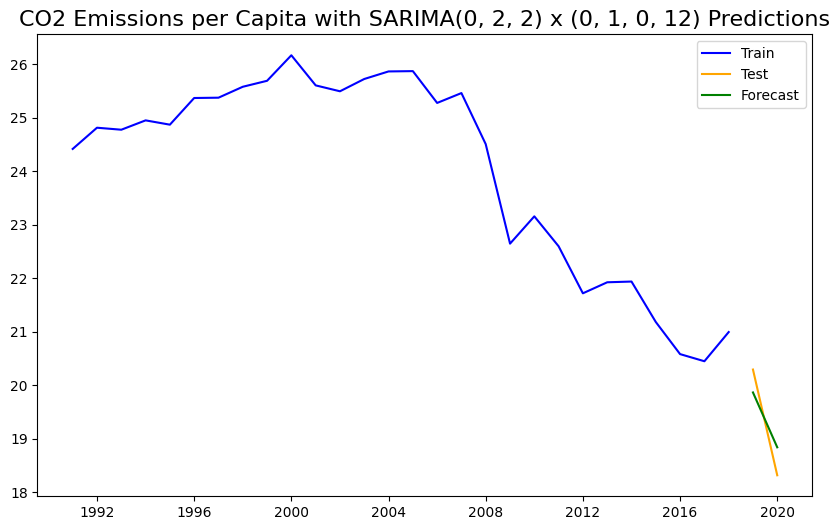

In [233]:
# Evaluate predictions.
print(model_fit.aic)

# Plot data.
plt.figure(figsize=(10, 6))
plt.plot(train['CO2_Value'], color='blue', label='Train')
plt.plot(test['CO2_Value'], color='orange', label='Test')
plt.plot(forecast, color='green', label='Forecast')
plt.title('CO2 Emissions per Capita with SARIMA(0, 2, 2) x (0, 1, 0, 12) Predictions', fontsize=16)
plt.legend()
plt.show()

In [234]:
# Calculate residuals
residuals = test['CO2_Value'] - forecast

# Calculate mean squared error
mse = mean_squared_error(test['CO2_Value'], forecast)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.47732556455724734


##### Our best model yet, with the lowest $\text{AIC}$ at $36.0$ and lowest $\text{RMSE}$ at $\sim0.477.$ This is the model that will have optimal performance for our purposes. 